> 해당 자료는 전북대학교 이영미 교수님 2023고급시계열분석 자료임

# 패키지

In [16]:
install.packages("forecast")

Installing package into ‘/home/coco/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Warning message in install.packages("forecast"):
“installation of package ‘forecast’ had non-zero exit status”


In [3]:
############## package
library(forecast) #ses
library(data.table)
library(ggplot2)
library(lmtest) #dwtest
library(TTR) #SMA


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




자꾸 forecast 설치가 안되넹

In [3]:
options(repr.plot.width = 15, repr.plot.height = 8)


# 이동평균법

## Kings data

In [14]:
kings=scan("http://robjhyndman.com/tsdldata/misc/kings.dat",skip=3)

In [5]:
kings

[1] 60 43 67 50 56 42 50 65 68 43 65 34 47 34 49 41 13 35 53 56 16 43 69 59 48
[26] 59 86 55 68 51 33 49 67 77 81 67 71 81 68 70 77 56

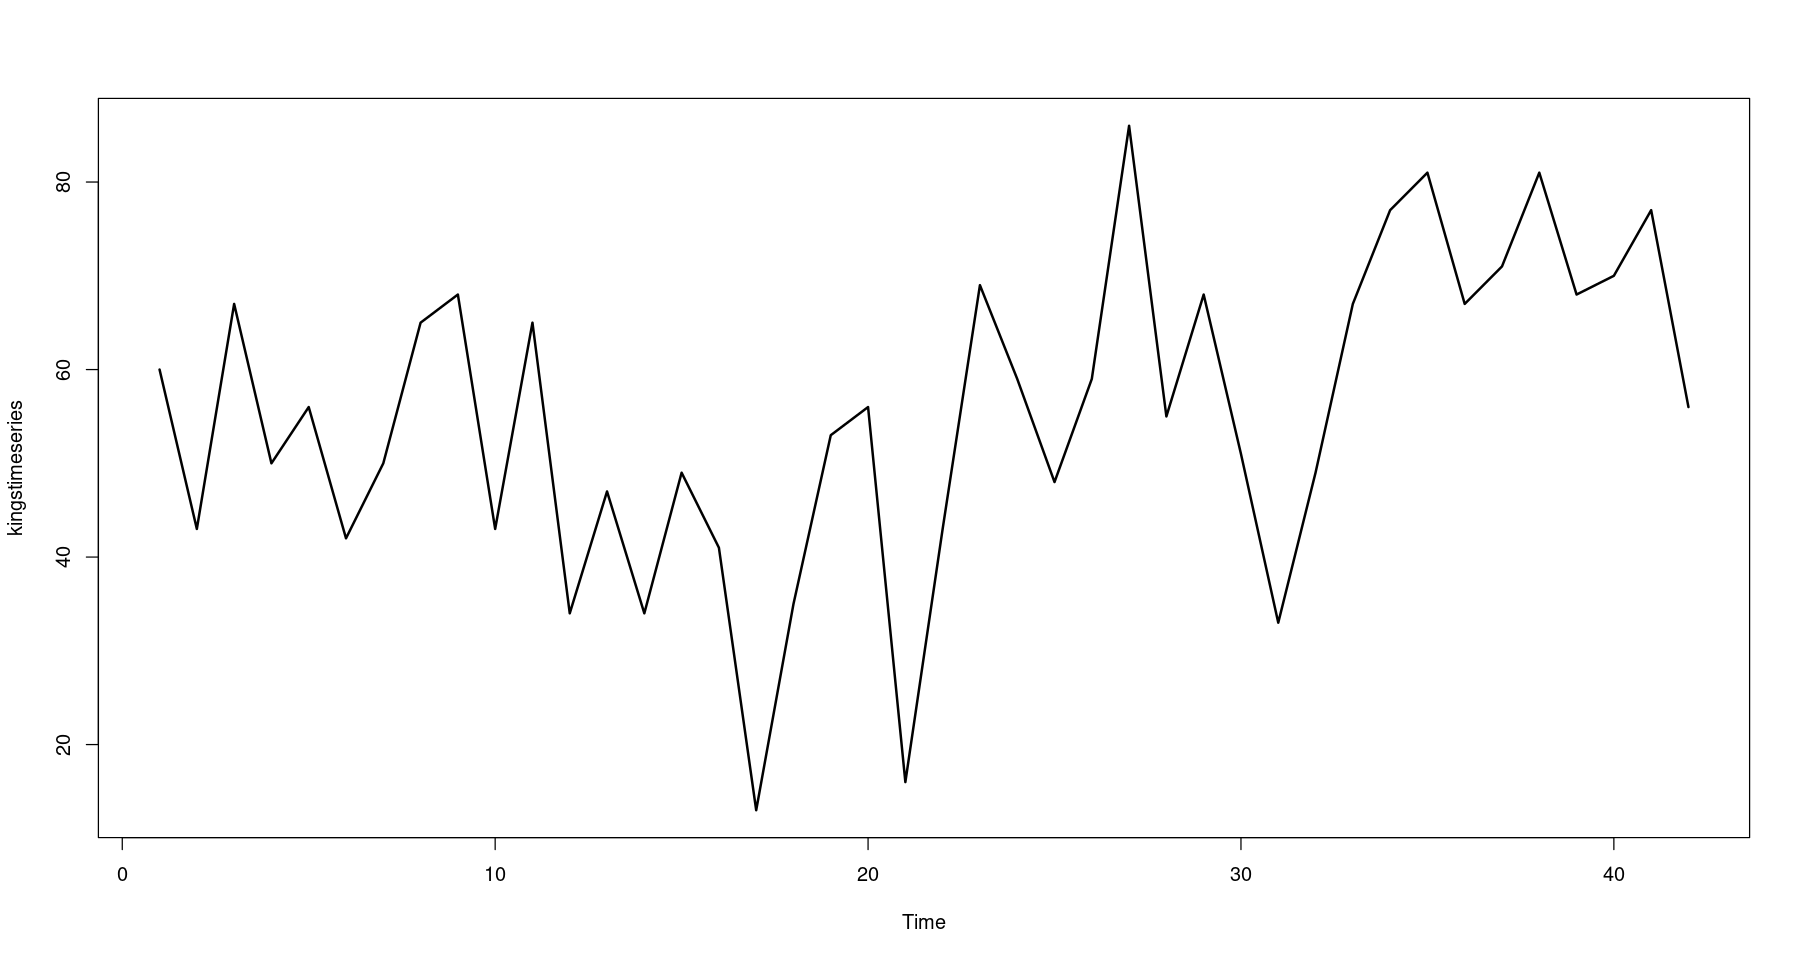

In [6]:
kingstimeseries = ts(kings)
plot(kingstimeseries, lwd=2)


In [7]:
kingstimeseries

A Time Series:
 [1] 60 43 67 50 56 42 50 65 68 43 65 34 47 34 49 41 13 35 53 56 16 43 69 59 48
[26] 59 86 55 68 51 33 49 67 77 81 67 71 81 68 70 77 56

- 1번왕은 60세까지, 2번왕은 43세까지, 3번왕은 67세까지.... 살았음

In [19]:
SMA(kings, n=3)

[1]       NA       NA 56.66667 53.33333 57.66667 49.33333 49.33333 52.33333
 [9] 61.00000 58.66667 58.66667 47.33333 48.66667 38.33333 43.33333 41.33333
[17] 34.33333 29.66667 33.66667 48.00000 41.66667 38.33333 42.66667 57.00000
[25] 58.66667 55.33333 64.33333 66.66667 69.66667 58.00000 50.66667 44.33333
[33] 49.66667 64.33333 75.00000 75.00000 73.00000 73.00000 73.33333 73.00000
[41] 71.66667 67.66667

- n=3이므로 첫번째, 두번째에서는 값을 알 수가 없다.

- `56.6666666666667` = `(60+43+67)/3`

꼭 ts로 필수적으로 바꿀 필요는 없다.

In [20]:
class(SMA(kings, n=3))

[1] "numeric"

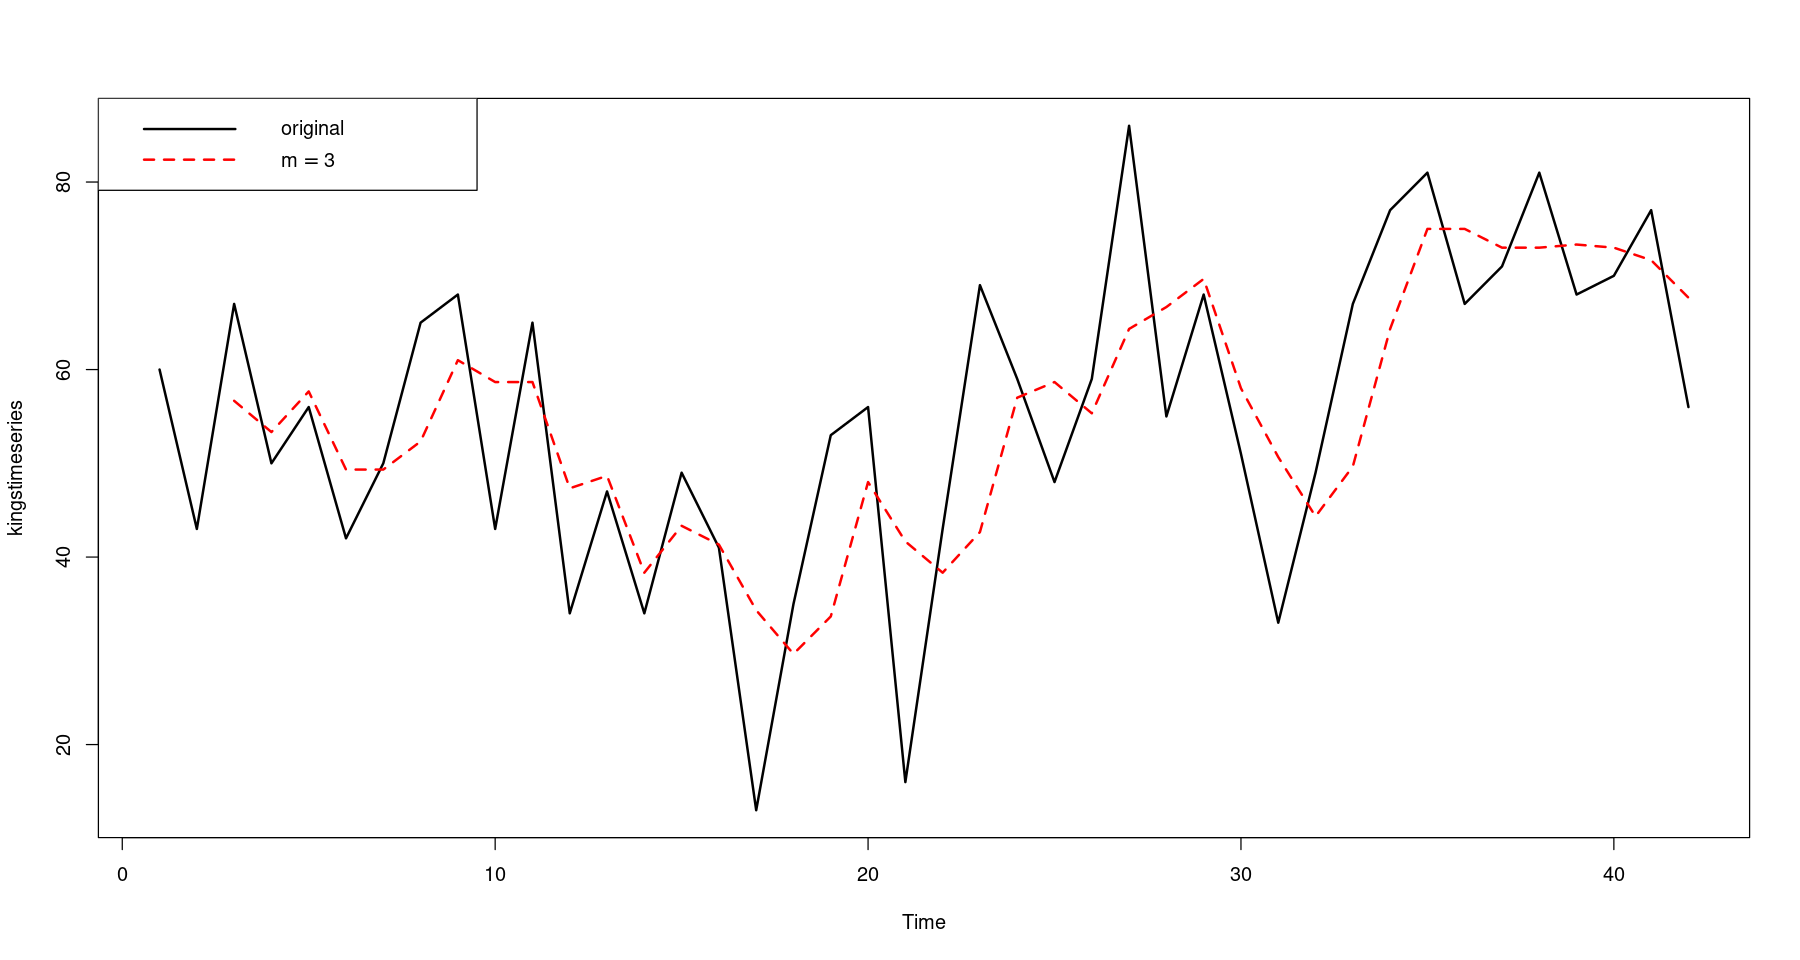

In [18]:
## window=3
kingstimeseriesSMA3 <- SMA(kingstimeseries,n=3)
plot.ts(kingstimeseries, lwd=2)
lines(kingstimeseriesSMA3, col='red', lty=2, lwd=2)
legend("topleft",
     legend=c("original", expression(m==3)), 
     col=c("black","red"),
     lty=c(1,2), lwd=2)

In [21]:
kingstimeseries

A Time Series:
 [1] 60 43 67 50 56 42 50 65 68 43 65 34 47 34 49 41 13 35 53 56 16 43 69 59 48
[26] 59 86 55 68 51 33 49 67 77 81 67 71 81 68 70 77 56

In [22]:
kingstimeseriesSMA3

A Time Series:
 [1]       NA       NA 56.66667 53.33333 57.66667 49.33333 49.33333 52.33333
 [9] 61.00000 58.66667 58.66667 47.33333 48.66667 38.33333 43.33333 41.33333
[17] 34.33333 29.66667 33.66667 48.00000 41.66667 38.33333 42.66667 57.00000
[25] 58.66667 55.33333 64.33333 66.66667 69.66667 58.00000 50.66667 44.33333
[33] 49.66667 64.33333 75.00000 75.00000 73.00000 73.00000 73.33333 73.00000
[41] 71.66667 67.66667

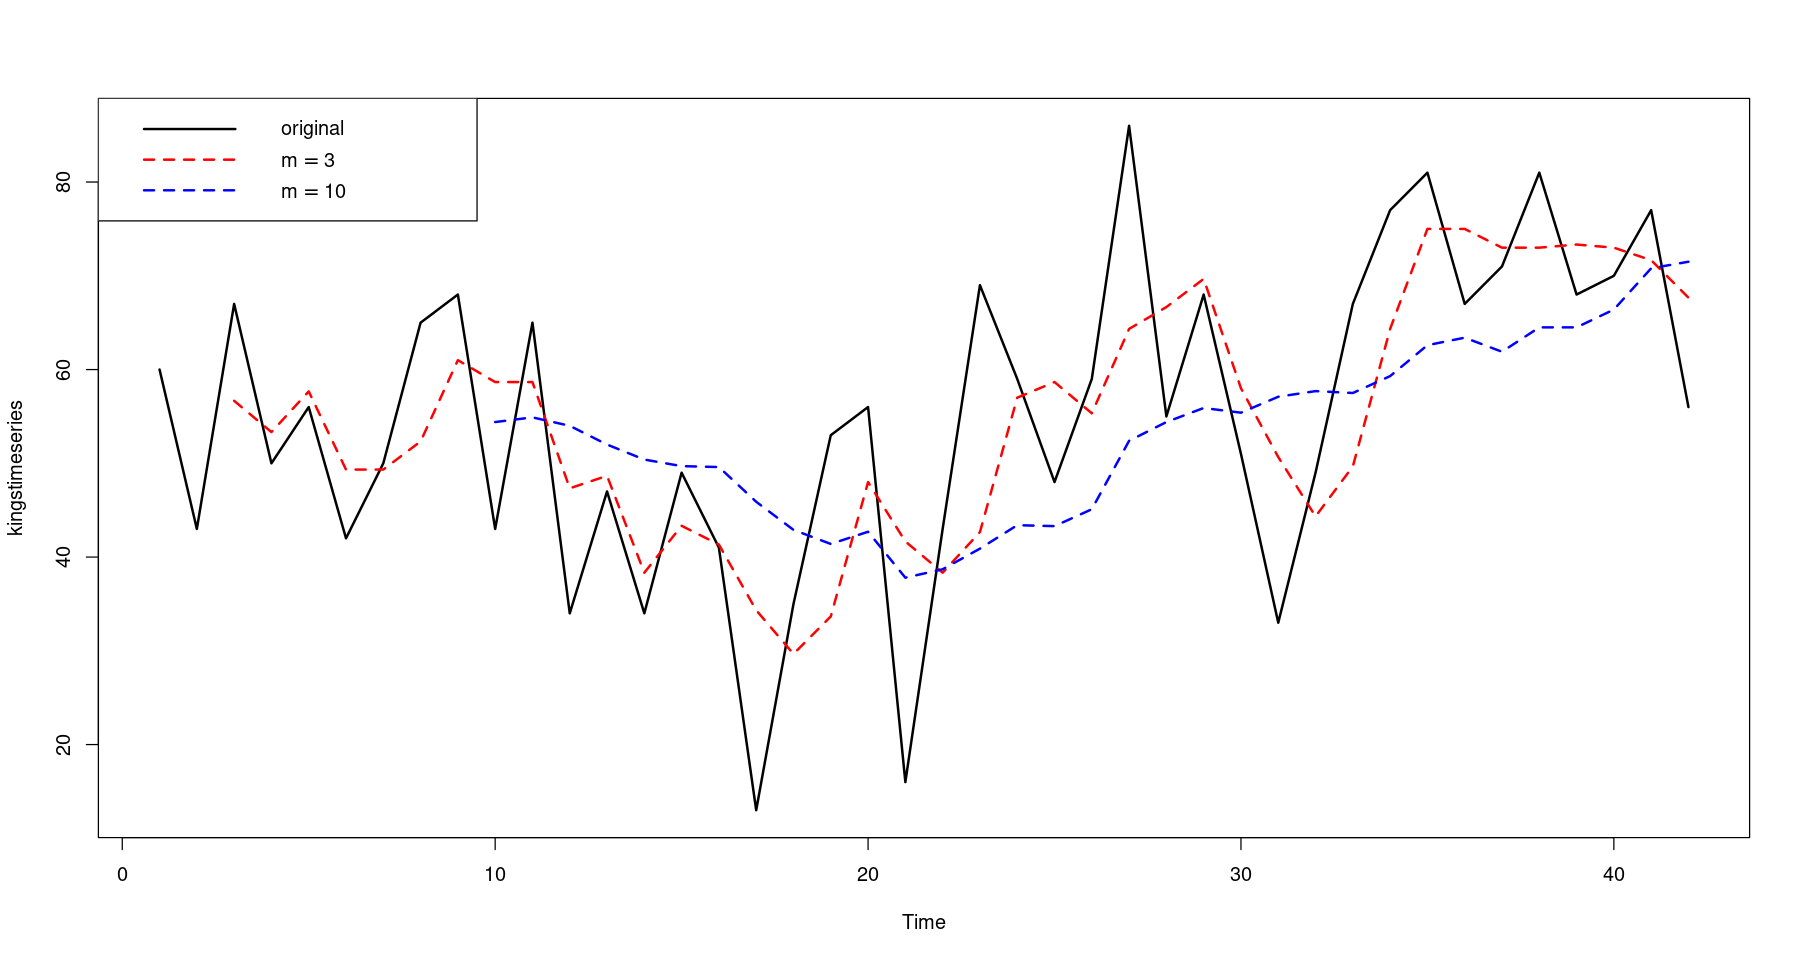

In [23]:
## window=3 vs. 10
plot.ts(kingstimeseries, lwd=2)
lines(kingstimeseriesSMA3, col='red', lty=2, lwd=2)
lines( SMA(kingstimeseries,n=10), col='blue', lty=2, lwd=2)
legend("topleft",
 legend=c("original", expression(m==3), expression(m==10)),
 col=c("black","red","blue"),
 lty=c(1,2,2), lwd=2)

### 모형 평가

In [29]:
length(kings)

[1] 42

In [36]:
## m=3
mean((kings[-1]- kingstimeseriesSMA3[-42])^2, na.rm=T) ##MSE : e_t(1)= z_{t+1} - hat z_t, t=3,4,...
mean(abs(kings[-1]- kingstimeseriesSMA3[-42]), na.rm=T) ##MAE
mean(abs(kings[-1]- kingstimeseriesSMA3[-42])/kings[-1], na.rm=T)*100 ##MAPE

[1] 262.6068

[1] 12.81197

[1] 31.5545

`na.rm=T` : 결측치는 제외하고

In [37]:
## m=10
mean((kings[-1]- SMA(kingstimeseries,n=10)[-42])^2, na.rm=T) ##MSE
mean(abs(kings[-1]- SMA(kingstimeseries,n=10)[-42]), na.rm=T) ##MAE
mean(abs(kings[-1]- SMA(kingstimeseries,n=10)[-42])/kings[-1], na.rm=T)*100 ##MAPE

[1] 288.6253

[1] 13.99687

[1] 35.73751

In [38]:
## m=4
mean((kings[-1]- SMA(kingstimeseries,n=4)[-42])^2, na.rm=T) ##MSE
mean(abs(kings[-1]- SMA(kingstimeseries,n=4)[-42]), na.rm=T) ##MAE
mean(abs(kings[-1]- SMA(kingstimeseries,n=4)[-42])/kings[-1], na.rm=T)*100 ##MAPE

[1] 239.0099

[1] 12.13158

[1] 29.8129

- MSE가 제일 작은 값 찾아줘야 함

## mindex data

In [4]:
z <- scan("mindex.txt")
mindex <- ts(z, start = c(1986, 1), frequency = 12)
mindex

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1986,9.3,10.7,13.3,14.1,17.8,18.1,19.4,18.8,19.1,18.4,18.0,17.0
1987,19.5,20.1,19.4,15.7,15.6,16.1,14.9,16.0,14.6,18.3,18.2,23.0
1988,22.2,22.1,18.8,17.7,13.8,12.7,16.5,15.6,16.3,10.7,10.4,7.0
1989,4.7,4.5,4.0,6.0,6.2,5.7,4.4,4.2,5.0,5.8,6.4,4.9
1990,7.9,8.2,11.8,10.0,11.1,11.7,12.4,15.2,14.0,15.2,12.9,18.0
1991,14.4,12.7,8.3,11.5,11.9,11.6,10.3,8.5,11.6,12.3,14.5,11.1
1992,11.8,12.4,12.7,9.8,10.0,10.2,9.6,6.9,5.3,4.8,4.6,1.9
1993,3.8,4.7,7.7,7.0,7.2,7.8,8.6,11.4,10.7,11.8,11.3,16.0
1994,13.2,12.0,8.5,11.4,,,,,,,,


In [5]:
mindex_sma3 <- SMA(mindex,n=3)
mindex_sma10 <- SMA(mindex,n=10)

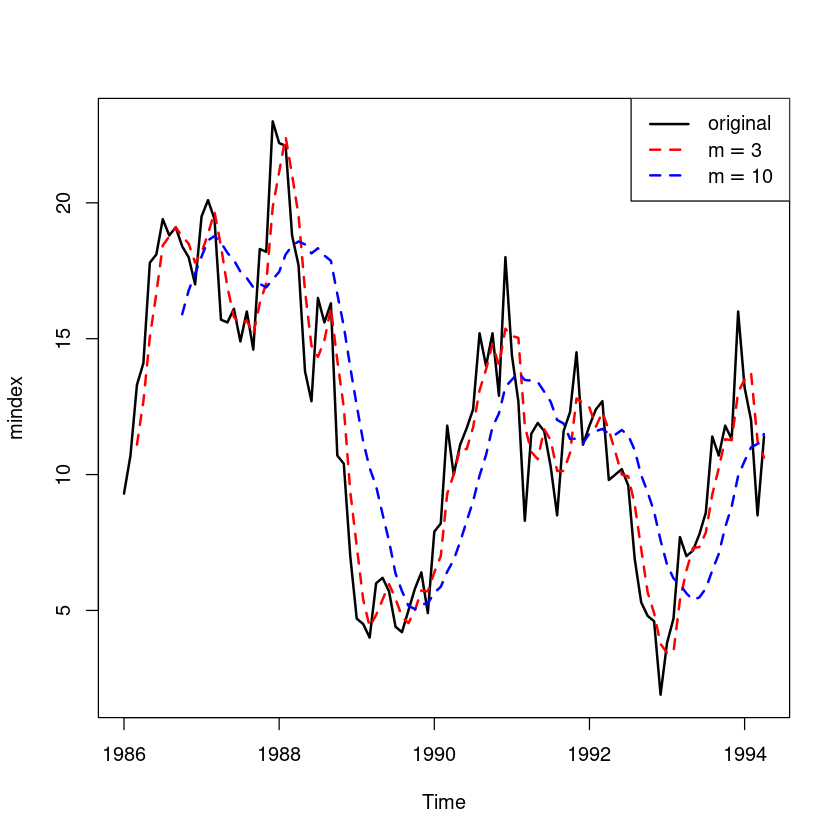

In [6]:
plot.ts(mindex, lwd=2)
lines(mindex_sma3, col='red', lty=2, lwd=2)
lines(mindex_sma10, col='blue', lty=2, lwd=2)
legend("topright",
     legend=c("original", expression(m==3), expression(m==10)),
     col=c("black","red","blue"),
     lty=c(1,2,2), lwd=2)

## depart data

In [48]:
z <- scan("depart.txt")
mindex <- ts(z, start = c(1986, 1), frequency = 12)
mindex

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1986,423,458,607,564,536,536,804,540,488,627,672,1447
1987,514,518,699,654,612,612,884,605,547,705,698,1555
1988,561,564,773,717,665,667,994,661,616,786,806,1754
1989,622,636,874,831,769,779,1142,764,718,930,943,2039
1990,736,752,1057,947,868,931,1311,896,867,1073,1069,2333


In [54]:
mindex_sma3 <- SMA(mindex,n=3)
mindex_sma12 <- SMA(mindex,n=12)

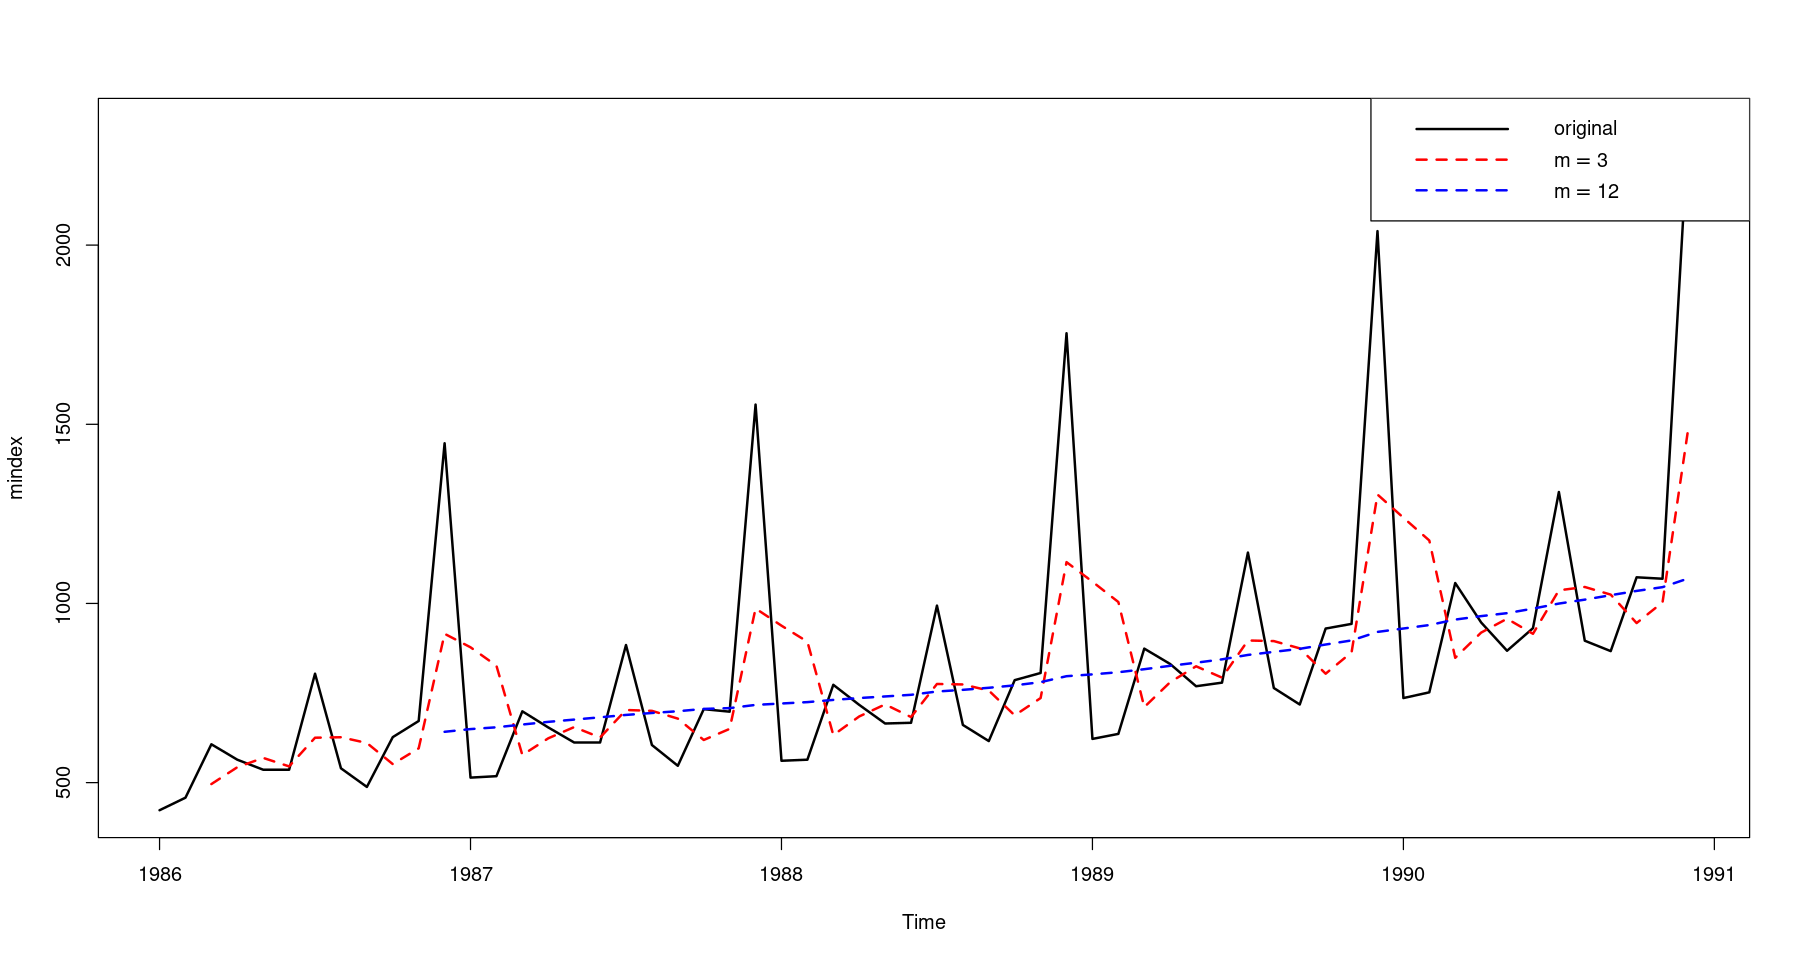

In [55]:
plot.ts(mindex, lwd=2)
lines(mindex_sma3, col='red', lty=2, lwd=2)
lines(mindex_sma12, col='blue', lty=2, lwd=2)
legend("topright",
     legend=c("original", expression(m==3), expression(m==12)),
     col=c("black","red","blue"),
     lty=c(1,2,2), lwd=2)

- 계절 성분 데이터를 평활하면.. m에 따라서 계절 성분이 없어진당

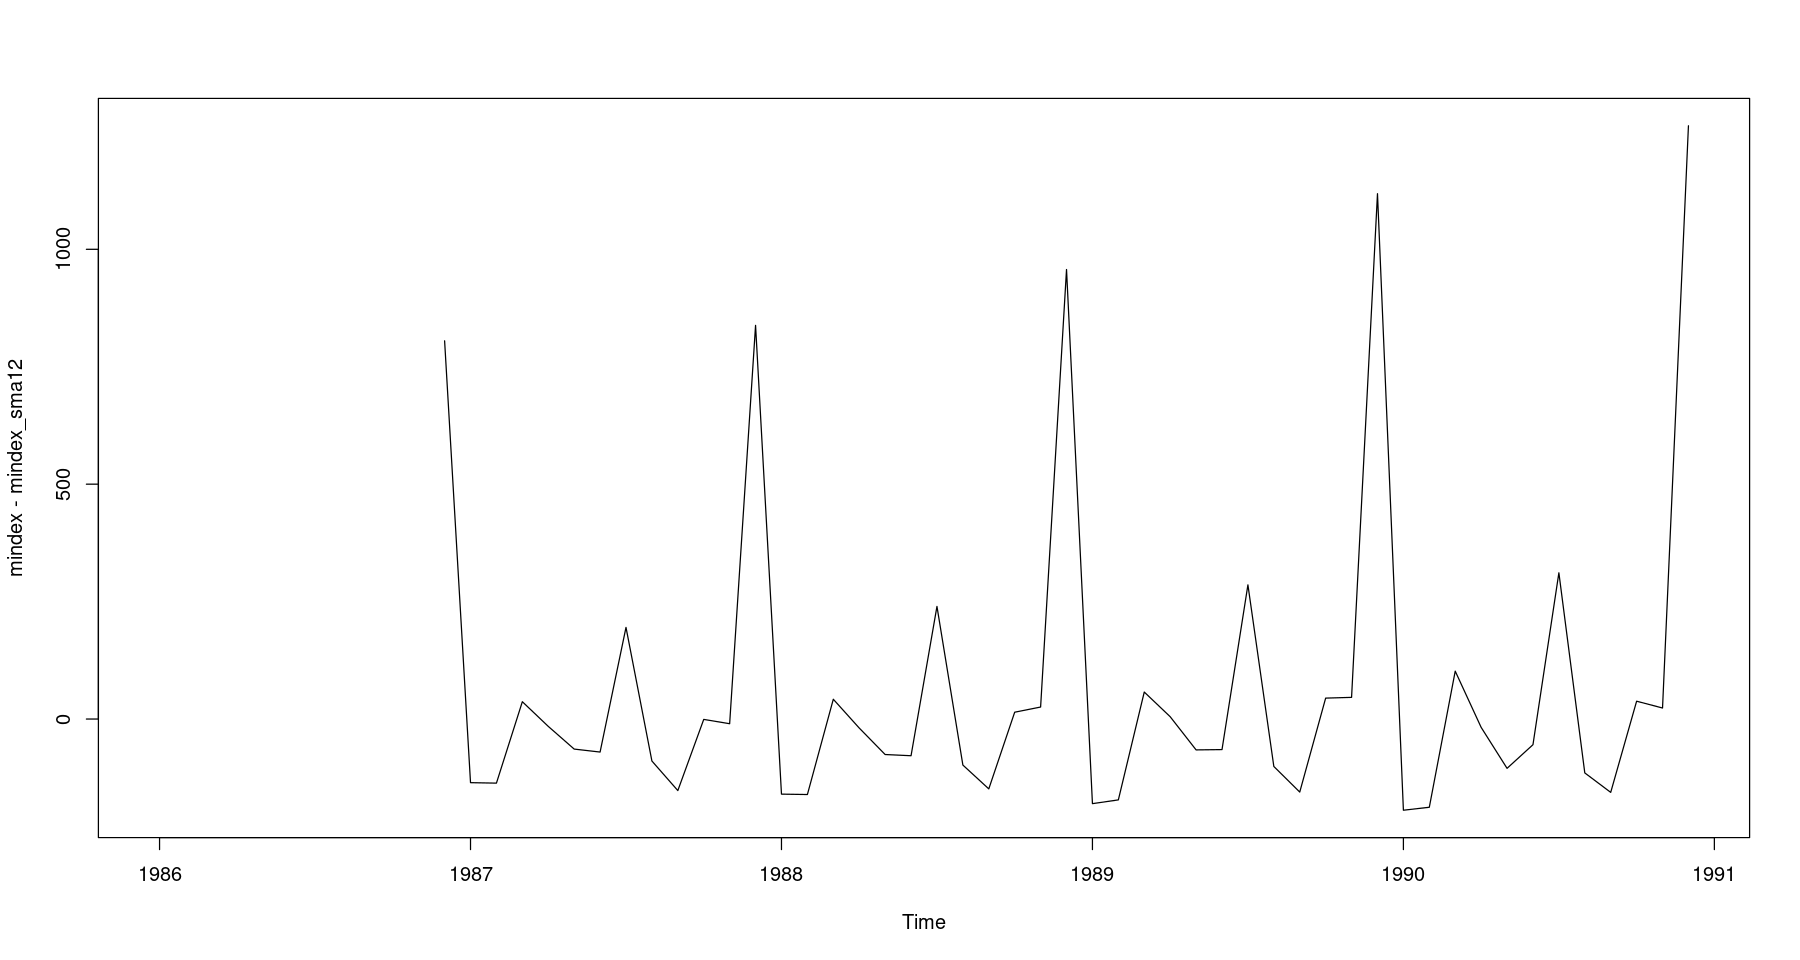

In [56]:
plot.ts(mindex-mindex_sma12)

- 계절성분만 있다. 이분산성이 조금 보이긴 하지만. 추후에 ch4장에서 분해법 할 때

# 단순지수평활법

In [7]:
z <- scan("mindex.txt")
mindex <- ts(z, start = c(1986, 1), frequency = 12)


In [8]:
tmp.dat <- data.frame(day = seq.Date(as.Date("1986-01-01"),
 by='month',
 length.out=length(z)), 
              ind = z)
head(tmp.dat)
                     

,day,ind
,<date>,<dbl>
1,1986-01-01,9.3
2,1986-02-01,10.7
3,1986-03-01,13.3
4,1986-04-01,14.1
5,1986-05-01,17.8
6,1986-06-01,18.1


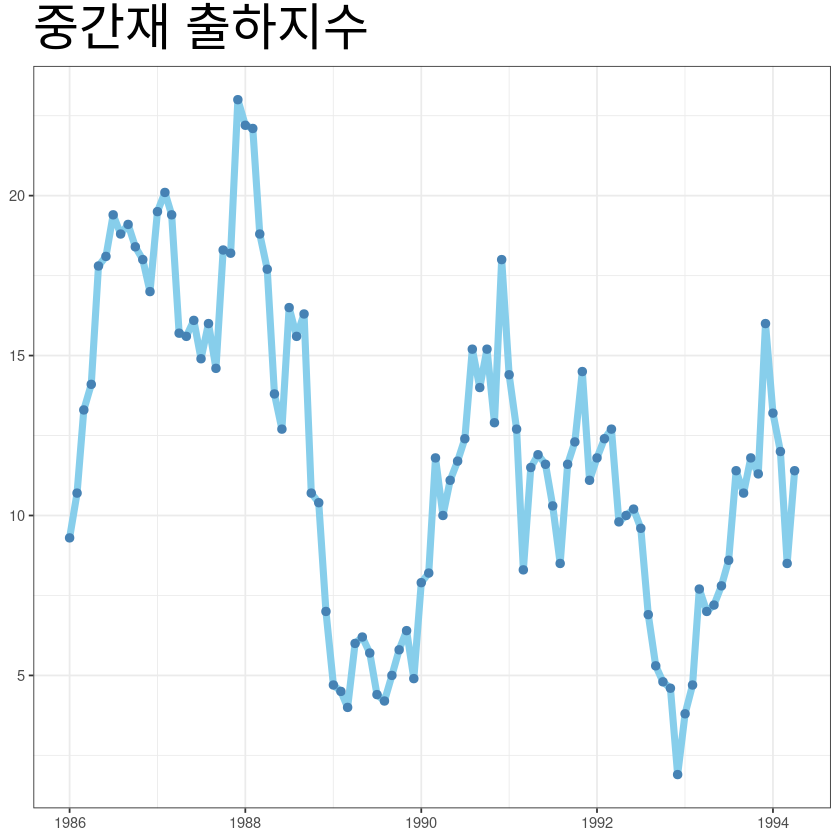

In [9]:
ggplot(tmp.dat, aes(day, ind))+geom_line(col='skyblue', lwd=2) +
 geom_point(col='steelblue', cex=2)+
 ggtitle("중간재 출하지수")+
 theme_bw()+
 theme(plot.title = element_text(size=30),
 axis.title = element_blank())


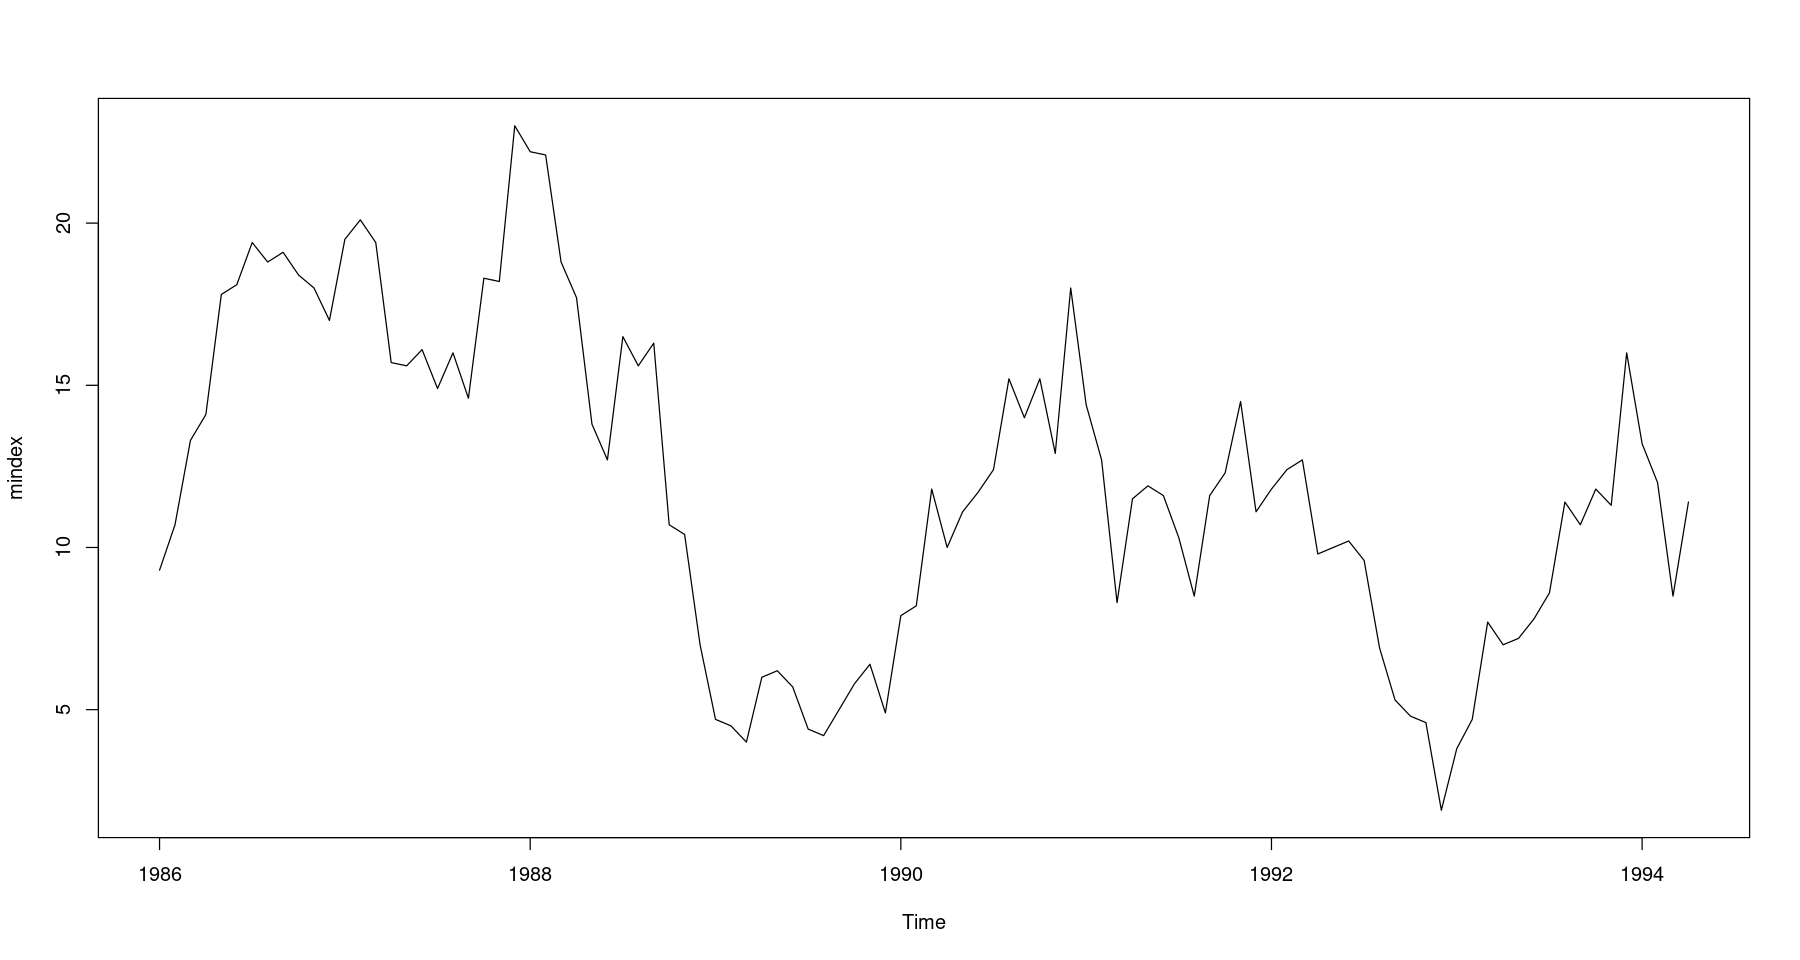

In [61]:
plot(mindex)

- 추세도 없어보이고 계절성분도 없어보이네? -> 단순지수평활을 하자

## 단순지수평활 $\alpha=0.3$

`-` 평활상수

- alpha: level

- beta: 기울기

- gamma: 계절

`-` 평활 초기값

- 아래 내용 살펴보자

- 단순지수평활에서는 초기값을 `x[1]`값 을 사용함

In [67]:
?HoltWinters

HoltWinters {stats},R Documentation
x,An object of class ts
alpha,alpha parameter of Holt-Winters Filter.
beta,"beta parameter of Holt-Winters Filter. If set to FALSE, the function will do exponential smoothing."
gamma,"gamma parameter used for the seasonal component. If set to FALSE, an non-seasonal model is fitted."
seasonal,"Character string to select an ""additive"" (the default) or ""multiplicative"" seasonal model. The first few characters are sufficient. (Only takes effect if gamma is non-zero)."
start.periods,Start periods used in the autodetection of start values. Must be at least 2.
l.start,Start value for level (a[0]).
b.start,Start value for trend (b[0]).
s.start,Vector of start values for the seasonal component (s_1[0] \ldots s_p[0])
optim.start,"Vector with named components alpha, beta, and gamma containing the starting values for the optimizer. Only the values needed must be specified. Ignored in the one-parameter case."


In [10]:
fit0 <- HoltWinters(mindex,
                    alpha=0.3,
                    beta=FALSE,
                    gamma=FALSE)


In [11]:
fit0

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = mindex, alpha = 0.3, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.3
 beta : FALSE
 gamma: FALSE

Coefficients:
     [,1]
a 11.2236

- coefficeints: 마지막 관측값(평활값)에 대한 값이 예측값이 되는것.

- 예측갱신

$$S_n^{(1)} = w Z_n + (1-w) S_{n-1}^{(1)}$$

In [13]:
tail(fit0$fitted)

,xhat,level
Nov 1993,9.97951,9.97951
Dec 1993,10.37566,10.37566
Jan 1994,12.06296,12.06296
Feb 1994,12.40407,12.40407
Mar 1994,12.28285,12.28285
Apr 1994,11.14800,11.14800


`coefficients`: 11.14800 마지막 평활값

In [14]:
ls(fit0)


[1] "alpha"        "beta"         "call"         "coefficients" "fitted"      
[6] "gamma"        "seasonal"     "SSE"          "x"

In [15]:
head(fit0$fitted)   ## 평활값

,xhat,level
Feb 1986,9.30000,9.30000
Mar 1986,9.72000,9.72000
Apr 1986,10.79400,10.79400
May 1986,11.78580,11.78580
Jun 1986,13.59006,13.59006
Jul 1986,14.94304,14.94304


In [16]:
head(cbind(fit0$fitted, mindex))

,fit0$fitted.xhat,fit0$fitted.level,mindex
Jan 1986,NA,NA,9.3
Feb 1986,9.30000,9.30000,10.7
Mar 1986,9.72000,9.72000,13.3
Apr 1986,10.79400,10.79400,14.1
May 1986,11.78580,11.78580,17.8
Jun 1986,13.59006,13.59006,18.1


- 관측 값이 쌓여야 해 ~ 

- 단순지수평활통계량

$$S_n^{(1)} = w \sum_{j=0}^{n-1} (1-w)^j Z_{n-j} + (1-w)^n S_0^{(1)}$$

$S_2^{(1)} = w  Z_2 + (1-w) S_0^{(1)}$

In [75]:
0.3*10.7 + 0.7*9.3

[1] 9.72

$S_3^{(1)} = w  Z_3 + w  (1-w)  Z_2 + (1-w)^2 S_0^{(1)}$

In [78]:
0.3*13.3 + 0.3*0.7*10.7 + 0.7*0.7*9.3

[1] 10.794

---

In [70]:
fit0$SSE

[1] 792.9686

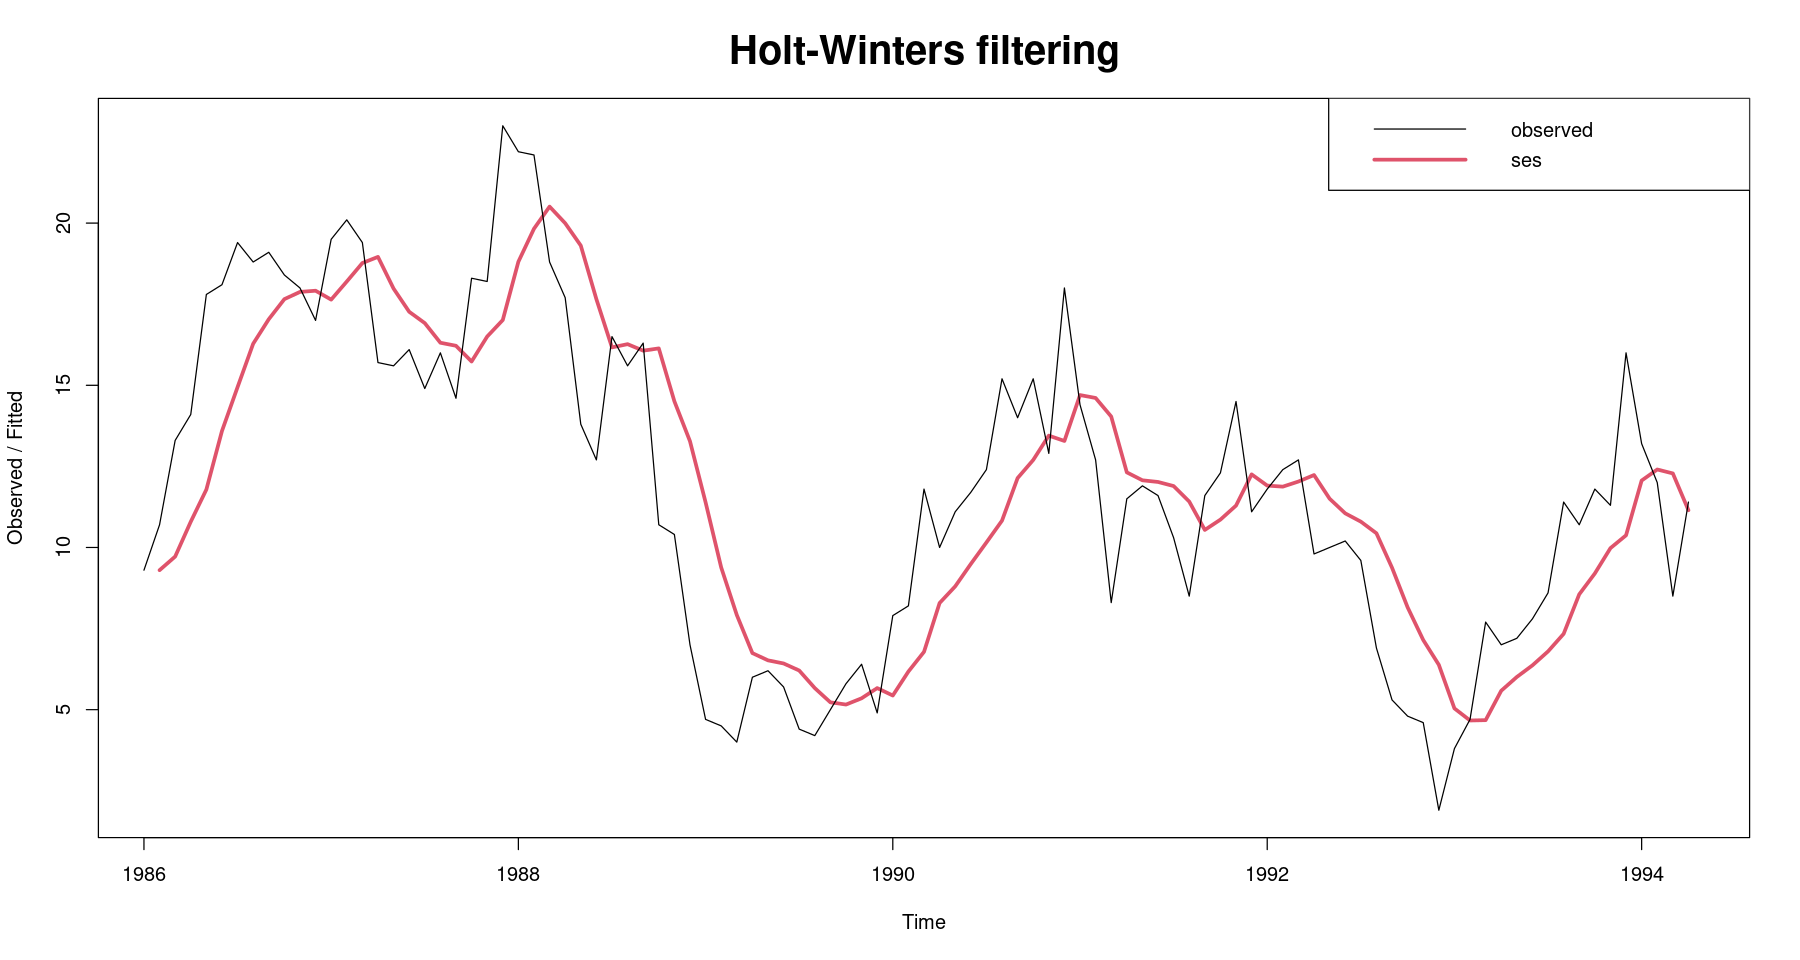

In [79]:
plot(fit0, lwd=3, cex.main = 2)
legend("topright", legend=c("observed", "ses"), lty=1,lwd=c(1,3), col=1:2)

In [17]:
fit01 <- ses(mindex,
 alpha = 0.3,
 initial = 'simple',
 h = 10) ##Exponential smoothing forecasts


- `ses`: 단순지수평활만 가능한 함수

- `h`: 마지막 데이터 이후 앞으로 예측하고 싶은 구간

In [18]:
fit01

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
May 1994        11.2236 7.614786 14.83241 5.704397 16.74280
Jun 1994        11.2236 7.455888 14.99131 5.461383 16.98581
Jul 1994        11.2236 7.303425 15.14377 5.228212 17.21898
Aug 1994        11.2236 7.156674 15.29052 5.003775 17.44342
Sep 1994        11.2236 7.015037 15.43216 4.787159 17.66003
Oct 1994        11.2236 6.878013 15.56918 4.577601 17.86959
Nov 1994        11.2236 6.745181 15.70201 4.374450 18.07274
Dec 1994        11.2236 6.616176 15.83102 4.177155 18.27004
Jan 1995        11.2236 6.490686 15.95651 3.985235 18.46196
Feb 1995        11.2236 6.368439 16.07875 3.798273 18.64892

In [19]:
ls(fit01)


[1] "fitted"    "level"     "lower"     "mean"      "method"    "model"    
 [7] "residuals" "series"    "upper"     "x"

In [20]:
summary(fit01)


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = mindex, h = 10, initial = "simple", alpha = 0.3) 

  Smoothing parameters:
    alpha = 0.3 

  Initial states:
    l = 9.3 

  sigma:  2.816
Error measures:
                     ME    RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set 0.06411989 2.81597 2.248923 -7.657492 24.93904 0.4105067 0.6648489

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
May 1994        11.2236 7.614786 14.83241 5.704397 16.74280
Jun 1994        11.2236 7.455888 14.99131 5.461383 16.98581
Jul 1994        11.2236 7.303425 15.14377 5.228212 17.21898
Aug 1994        11.2236 7.156674 15.29052 5.003775 17.44342
Sep 1994        11.2236 7.015037 15.43216 4.787159 17.66003
Oct 1994        11.2236 6.878013 15.56918 4.577601 17.86959
Nov 1994        11.2236 6.745181 15.70201 4.374450 18.07274
Dec 1994        11.2236 6.616176 15.83102 4.177155 18.27004
Jan 1995        11

- 마지막 평활값: 앞으로 사용할 예측값    <- coefficeint값으로 저장되어 있음

In [21]:
tail(cbind(fit0$fitted, mindex))

,fit0$fitted.xhat,fit0$fitted.level,mindex
Nov 1993,9.97951,9.97951,11.3
Dec 1993,10.37566,10.37566,16.0
Jan 1994,12.06296,12.06296,13.2
Feb 1994,12.40407,12.40407,12.0
Mar 1994,12.28285,12.28285,8.5
Apr 1994,11.14800,11.14800,11.4


`-` 예측 갱신

$$S_n^{(1)} = wZ_n + (1-w)S_{n-1}^{(1)}$$

$S_{100}^{(1)} = w Z_{100} + (1-w) S_{(99)}^{(1)}$

In [22]:
0.3*11.4+0.7*11.14800

[1] 11.2236

In [87]:
0.3*11.4+0.7*11.147995

[1] 11.2236

In [89]:
summary(fit01)


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = mindex, h = 10, initial = "simple", alpha = 0.3) 

  Smoothing parameters:
    alpha = 0.3 

  Initial states:
    l = 9.3 

  sigma:  2.816
Error measures:
                     ME    RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set 0.06411989 2.81597 2.248923 -7.657492 24.93904 0.4105067 0.6648489

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
May 1994        11.2236 7.614786 14.83241 5.704397 16.74280
Jun 1994        11.2236 7.455888 14.99131 5.461383 16.98581
Jul 1994        11.2236 7.303425 15.14377 5.228212 17.21898
Aug 1994        11.2236 7.156674 15.29052 5.003775 17.44342
Sep 1994        11.2236 7.015037 15.43216 4.787159 17.66003
Oct 1994        11.2236 6.878013 15.56918 4.577601 17.86959
Nov 1994        11.2236 6.745181 15.70201 4.374450 18.07274
Dec 1994        11.2236 6.616176 15.83102 4.177155 18.27004
Jan 1995        11

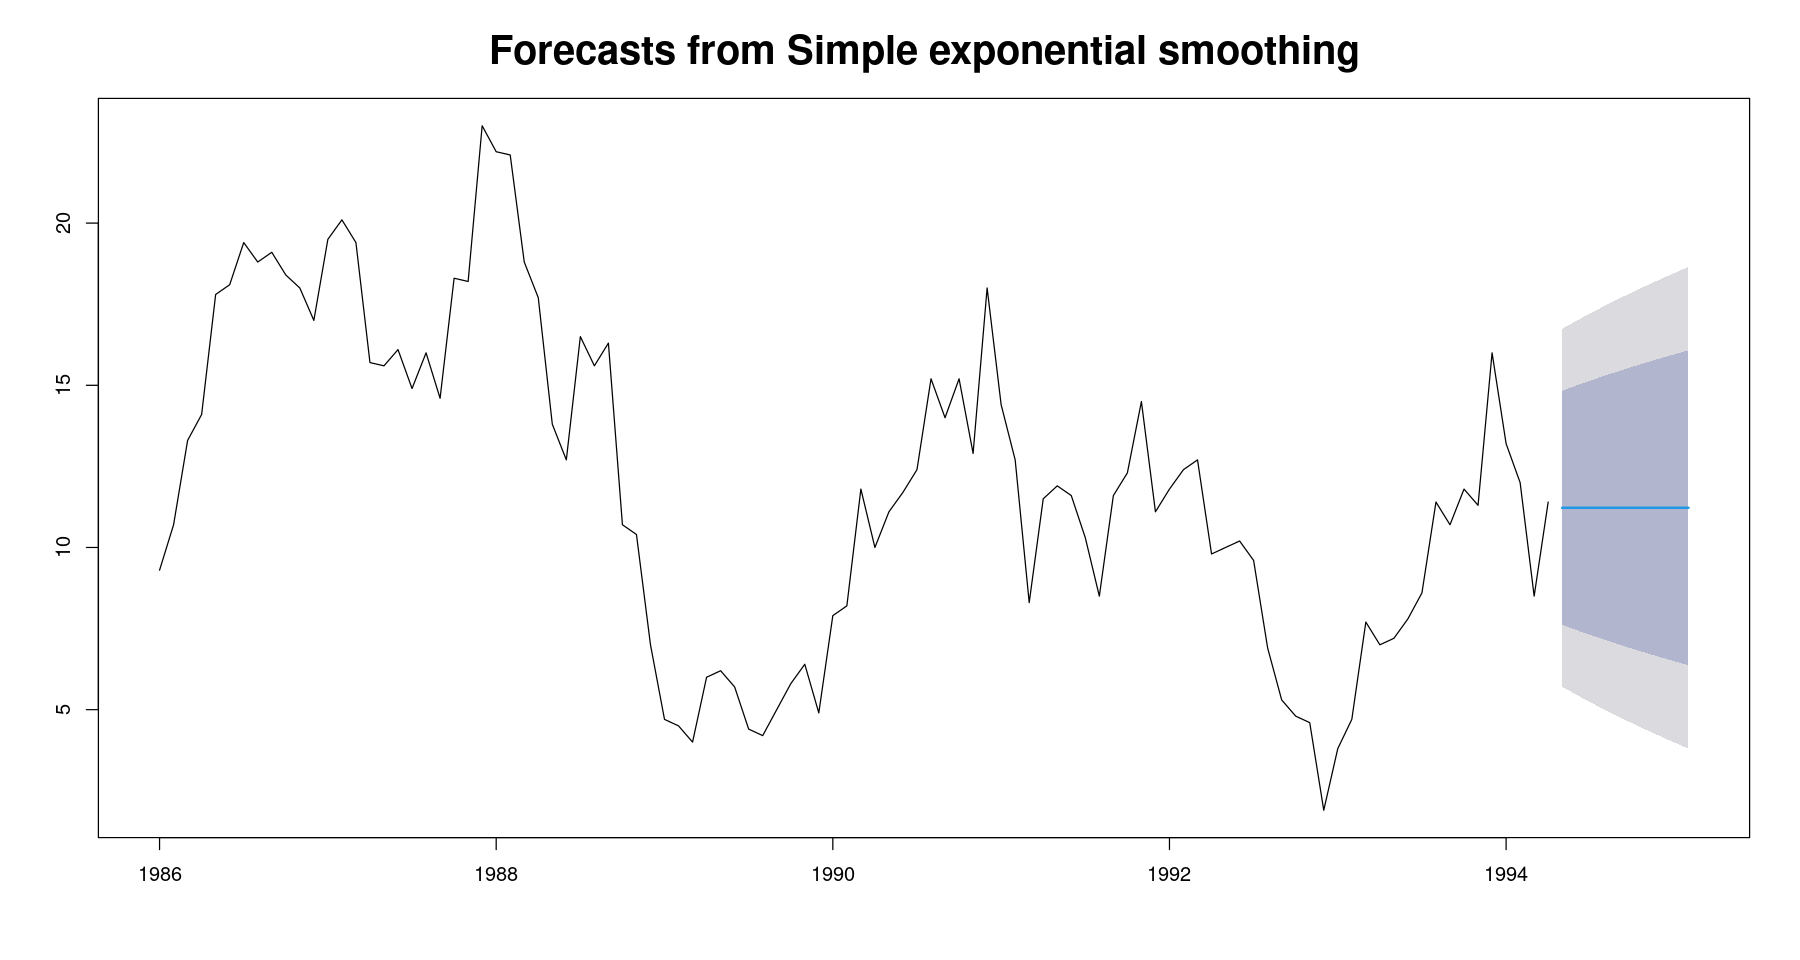

In [88]:
plot(fit01,, cex.main = 2)

## 여러 평활상수에 따른 변화

In [90]:
w <-c(seq(0.1,0.8,0.1), seq(0.81, 0.99, 0.01))

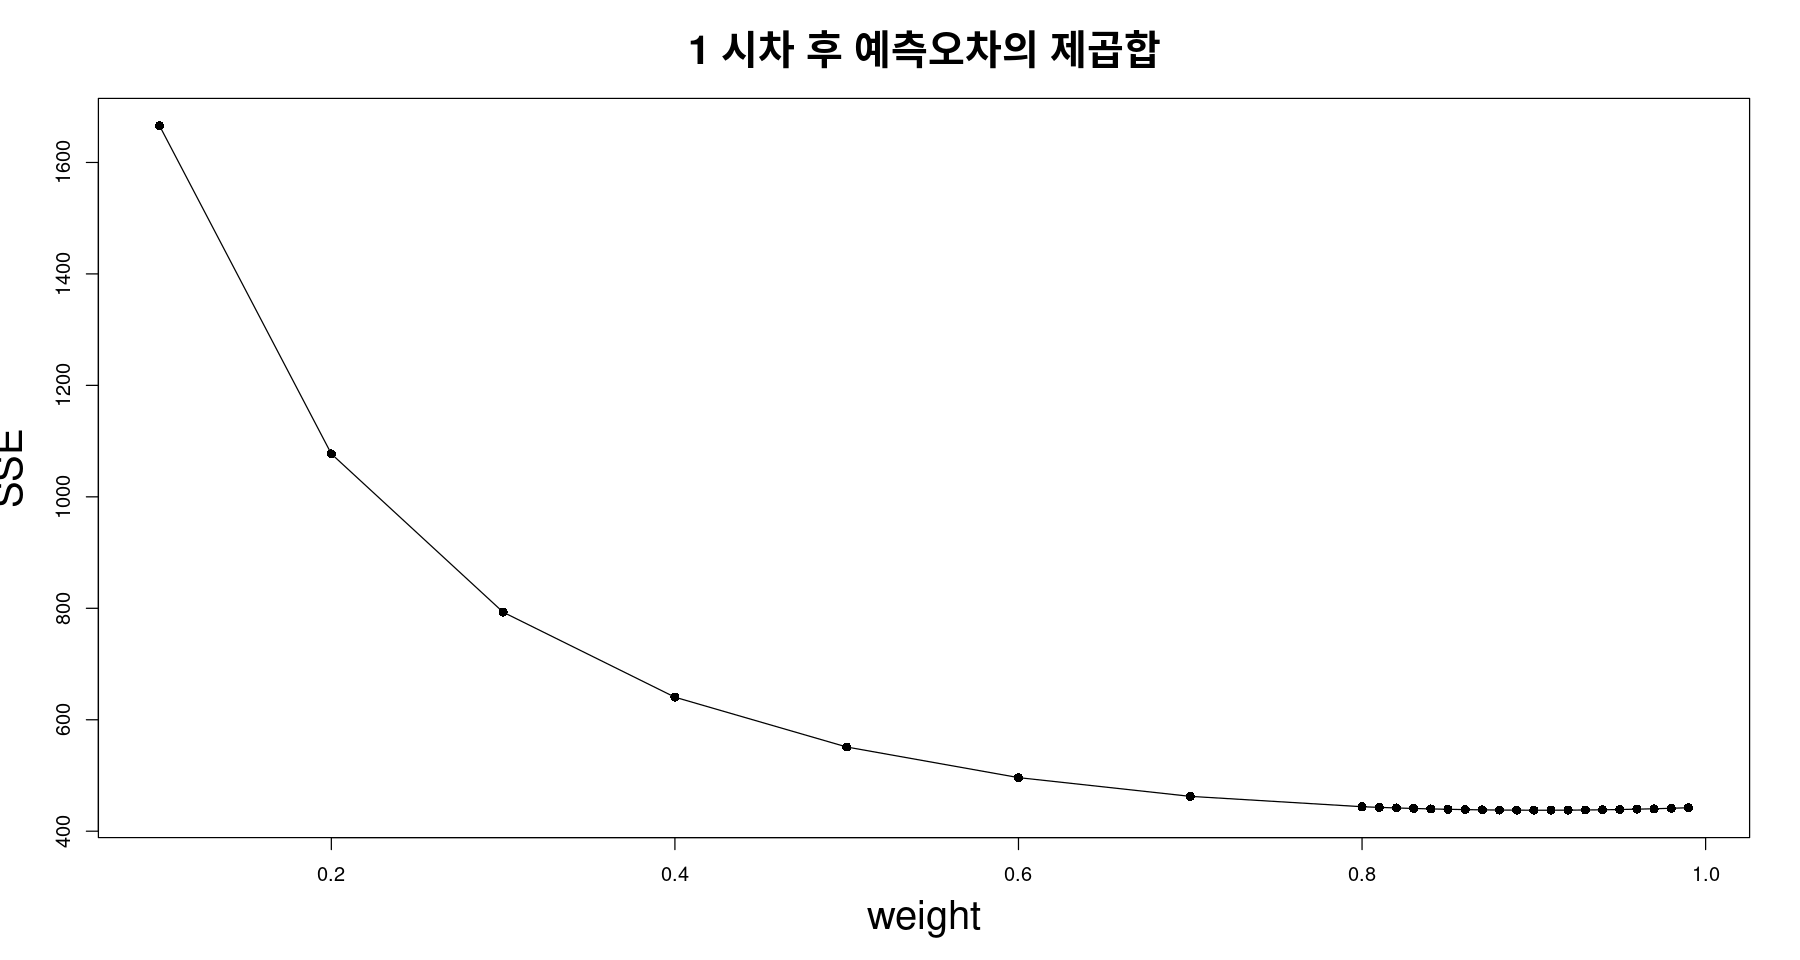

In [91]:
SSE_ses <- sapply(w, function(alpha) HoltWinters(mindex,
                 alpha=alpha,
                 beta=FALSE,
                 gamma=FALSE)$SSE)
plot(w,SSE_ses, type="o", xlab="weight", ylab="SSE", pch=16,
     main="1 시차 후 예측오차의 제곱합",
     cex.main = 2, cex.lab=2)


`-` SSE를 가장 작게 하는 값 찾자

In [98]:
which.min(SSE_ses)

[1] 18

In [99]:
w[which.min(SSE_ses)]

[1] 0.9

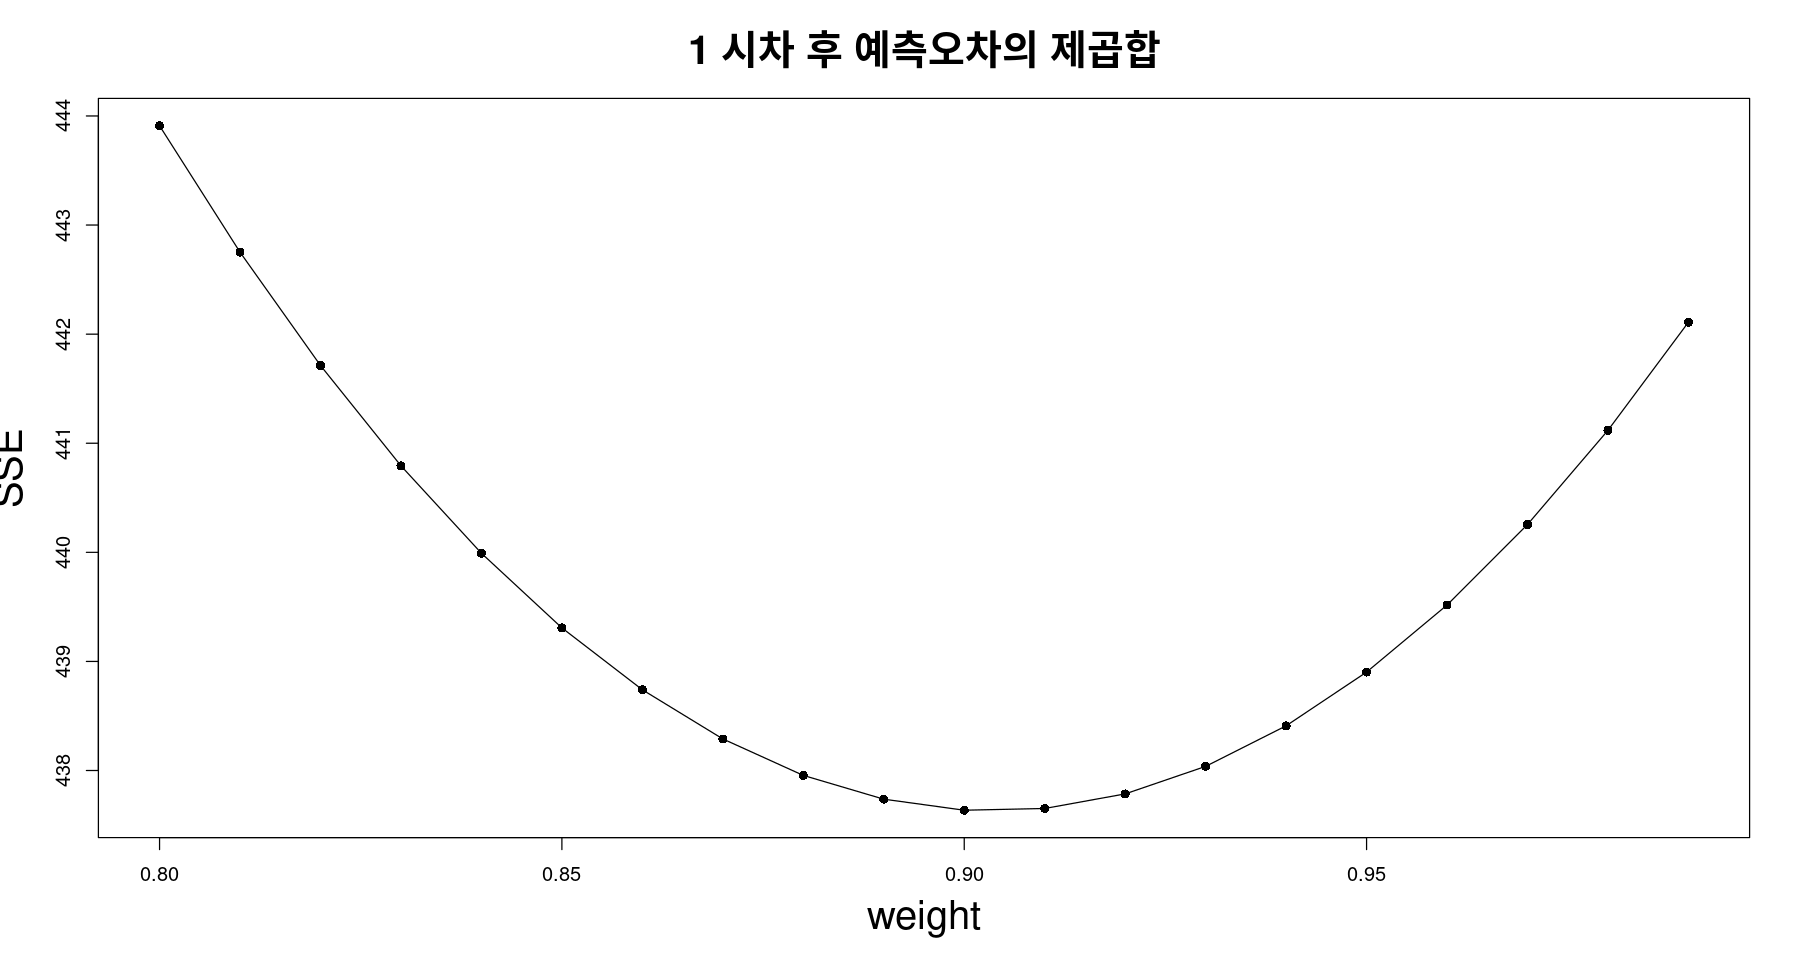

In [100]:
plot(w[-(1:7)],SSE_ses[-(1:7)], type="o", xlab="weight", ylab="SSE", pch=16,
 main="1 시차 후 예측오차의 제곱합",
 cex.main = 2, cex.lab=2)


In [101]:
fit1 <- ses(mindex, alpha=w[which.min(SSE_ses)], initial = "simple", h=6)

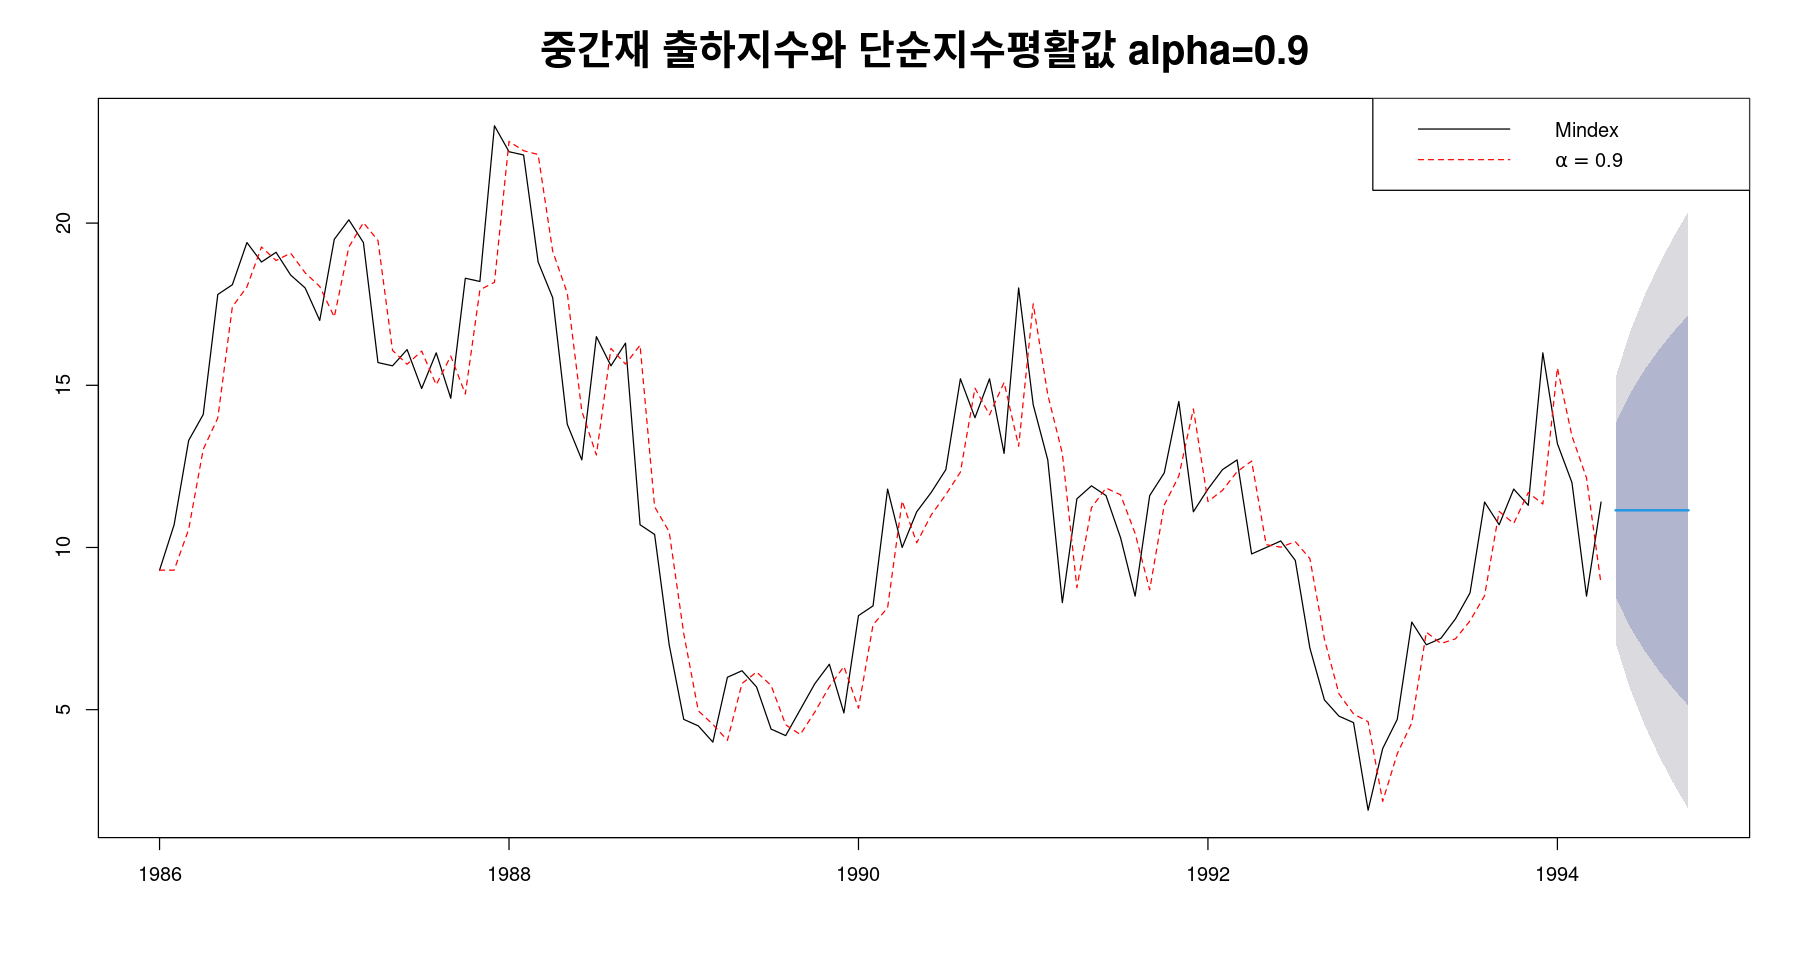

In [102]:
plot(fit1, xlab="", ylab="",
 main="중간재 출하지수와 단순지수평활값 alpha=0.9",
 lty=1,col="black",
 cex.main = 2, cex.lab=2 )
lines(fitted(fit1), col="red", lty=2)
legend("topright", legend=c("Mindex", expression(alpha==0.9)),
 lty=1:2,col=c("black","red"))


In [103]:
fit0_w <- HoltWinters(mindex,
 beta=FALSE,
 gamma=FALSE)
fit0_w


Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = mindex, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.9036403
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 11.15433

- 위와 같이 alpha값을 지정해주지 않으면, 1시차 후의 SSE가 작은 값을 함수가 찾는다.

## 잔차

In [104]:
fit1 <- ses(mindex, alpha=fit0_w$alpha, h=12)

In [105]:
ls(fit1)

[1] "fitted"    "level"     "lower"     "mean"      "method"    "model"    
 [7] "residuals" "series"    "upper"     "x"

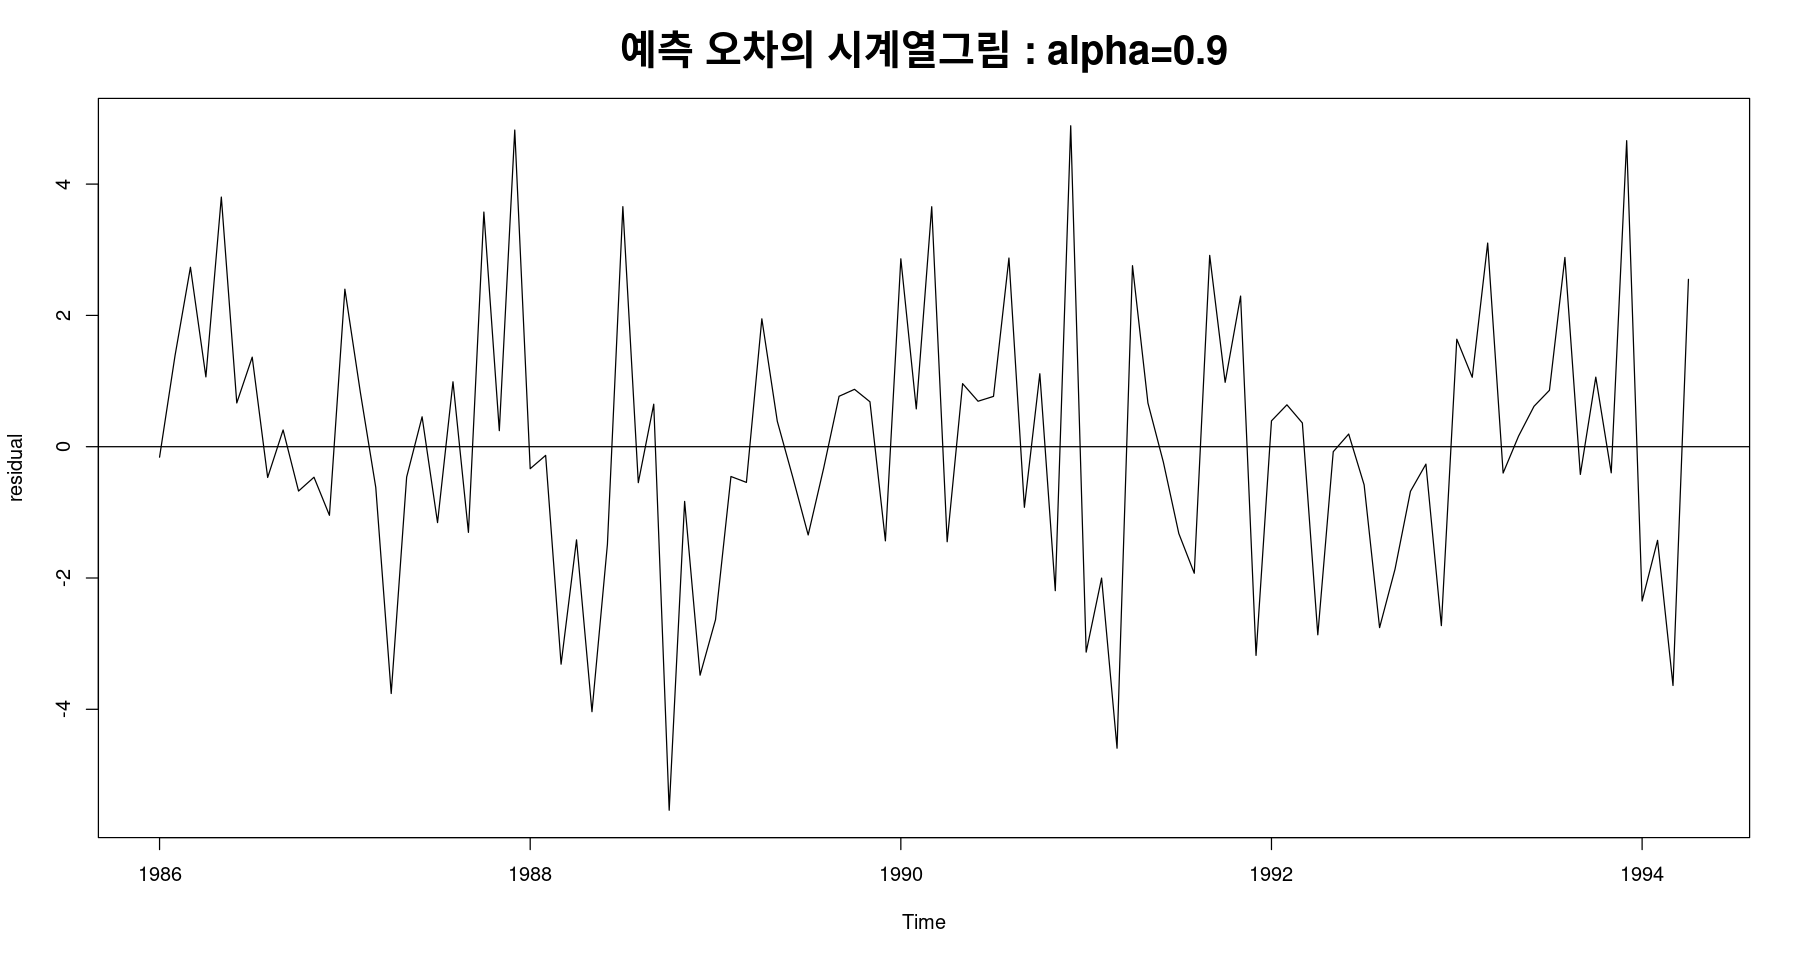

In [106]:
plot(fit1$residuals, ylab="residual",
 main="예측 오차의 시계열그림 : alpha=0.9",
 cex.main = 2, cex.lab=2); abline(h=0)


### 오차의 평균이 0인가?

In [107]:
t.test(fit1$residual)



	One Sample t-test

data:  fit1$residual
t = 0.089225, df = 99, p-value = 0.9291
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.3983934  0.4359099
sample estimates:
 mean of x 
0.01875828 


- $H_0$: $\mu=0$ vs. $H_1: \mu \neq 0$

- 귀무가설을 기각할 수 없음. 평균은 0이다.

### 오차가 독립인가?

In [108]:
dwtest(lm(fit1$residual~1))


	Durbin-Watson test

data:  lm(fit1$residual ~ 1)
DW = 2.0244, p-value = 0.549
alternative hypothesis: true autocorrelation is greater than 0


- $H_0$: 독립이다.

- dwtest에는 회귀모형이 들어가야 함.



In [109]:
dwtest(lm(fit1$residual~1), alternative = "two.sided")


	Durbin-Watson test

data:  lm(fit1$residual ~ 1)
DW = 2.0244, p-value = 0.902
alternative hypothesis: true autocorrelation is not 0


- 독립이다.

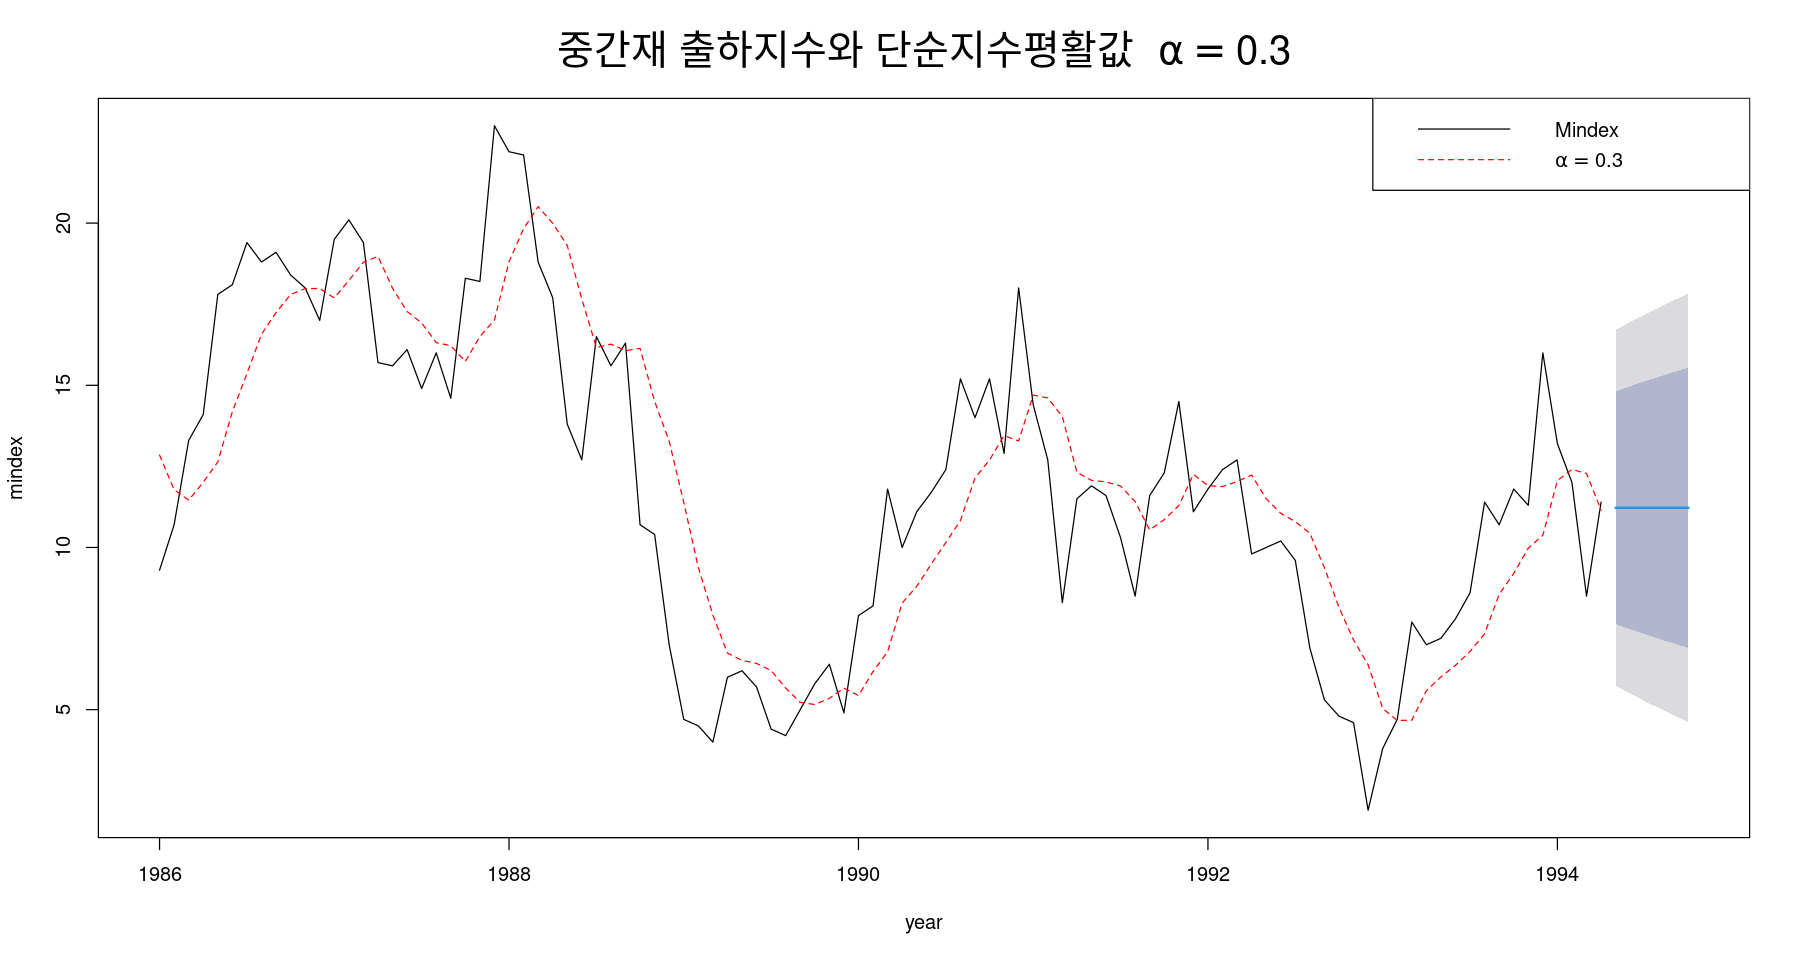

In [110]:
fit2 <- ses(mindex, alpha=0.3, h=6)
plot(fit2, xlab="year", ylab="mindex",
 main=expression("중간재 출하지수와 단순지수평활값 "~alpha==0.3),
 lty=1,col="black",
 cex.main = 2,
 cex.lab=2)
lines(fitted(fit2), col="red", lty=2)
legend("topright",
 legend=c("Mindex",expression(alpha==0.3)),
 lty=1:2,
 col=c("black","red"))


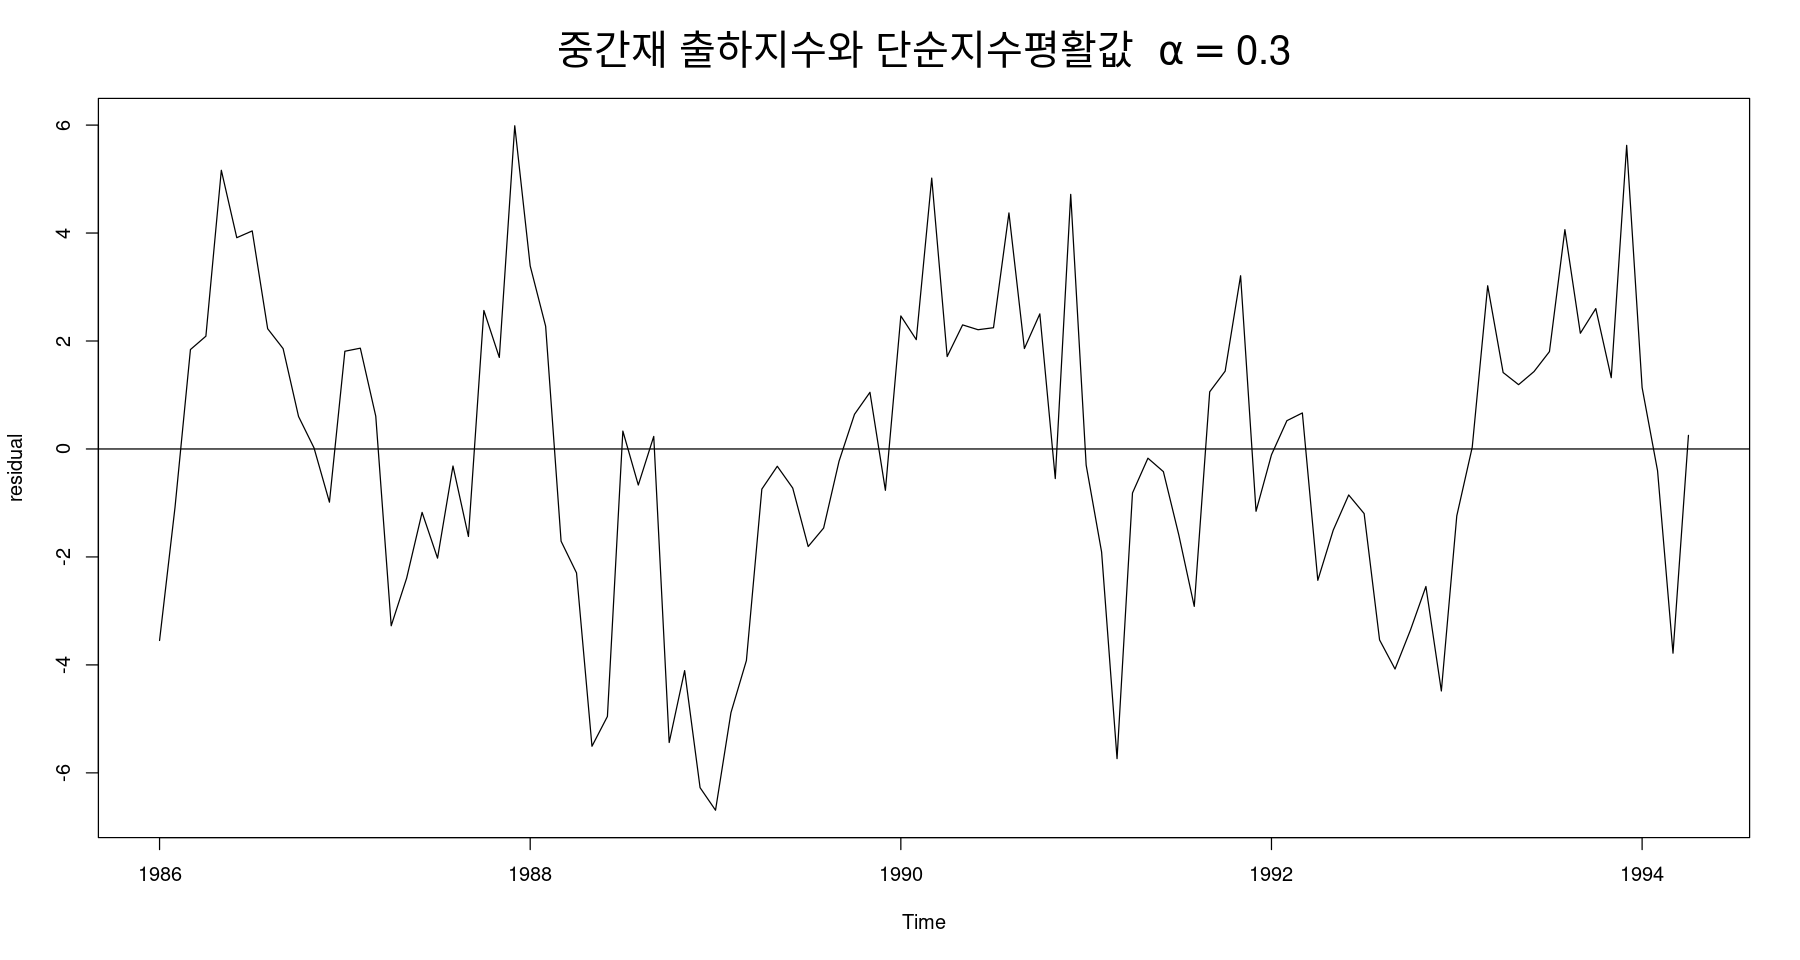

In [111]:
plot(fit2$residuals, ylab="residual",
 main=expression("중간재 출하지수와 단순지수평활값 "~alpha==0.3),
 cex.main = 2,
 cex.lab=2); abline(h=0)


오차의 평균이 0인가?


In [112]:
t.test(fit2$residual)


	One Sample t-test

data:  fit2$residual
t = -0.19433, df = 99, p-value = 0.8463
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.6067721  0.4985236
sample estimates:
  mean of x 
-0.05412425 


오차가 독립인가?

In [113]:
dwtest(lm(fit2$residual~1))


	Durbin-Watson test

data:  lm(fit2$residual ~ 1)
DW = 0.70285, p-value = 2.853e-11
alternative hypothesis: true autocorrelation is greater than 0


# 이중지수평활법

In [114]:
z <- scan("stock.txt")
stock <- ts(z, start=c(1984,1), frequency=12)


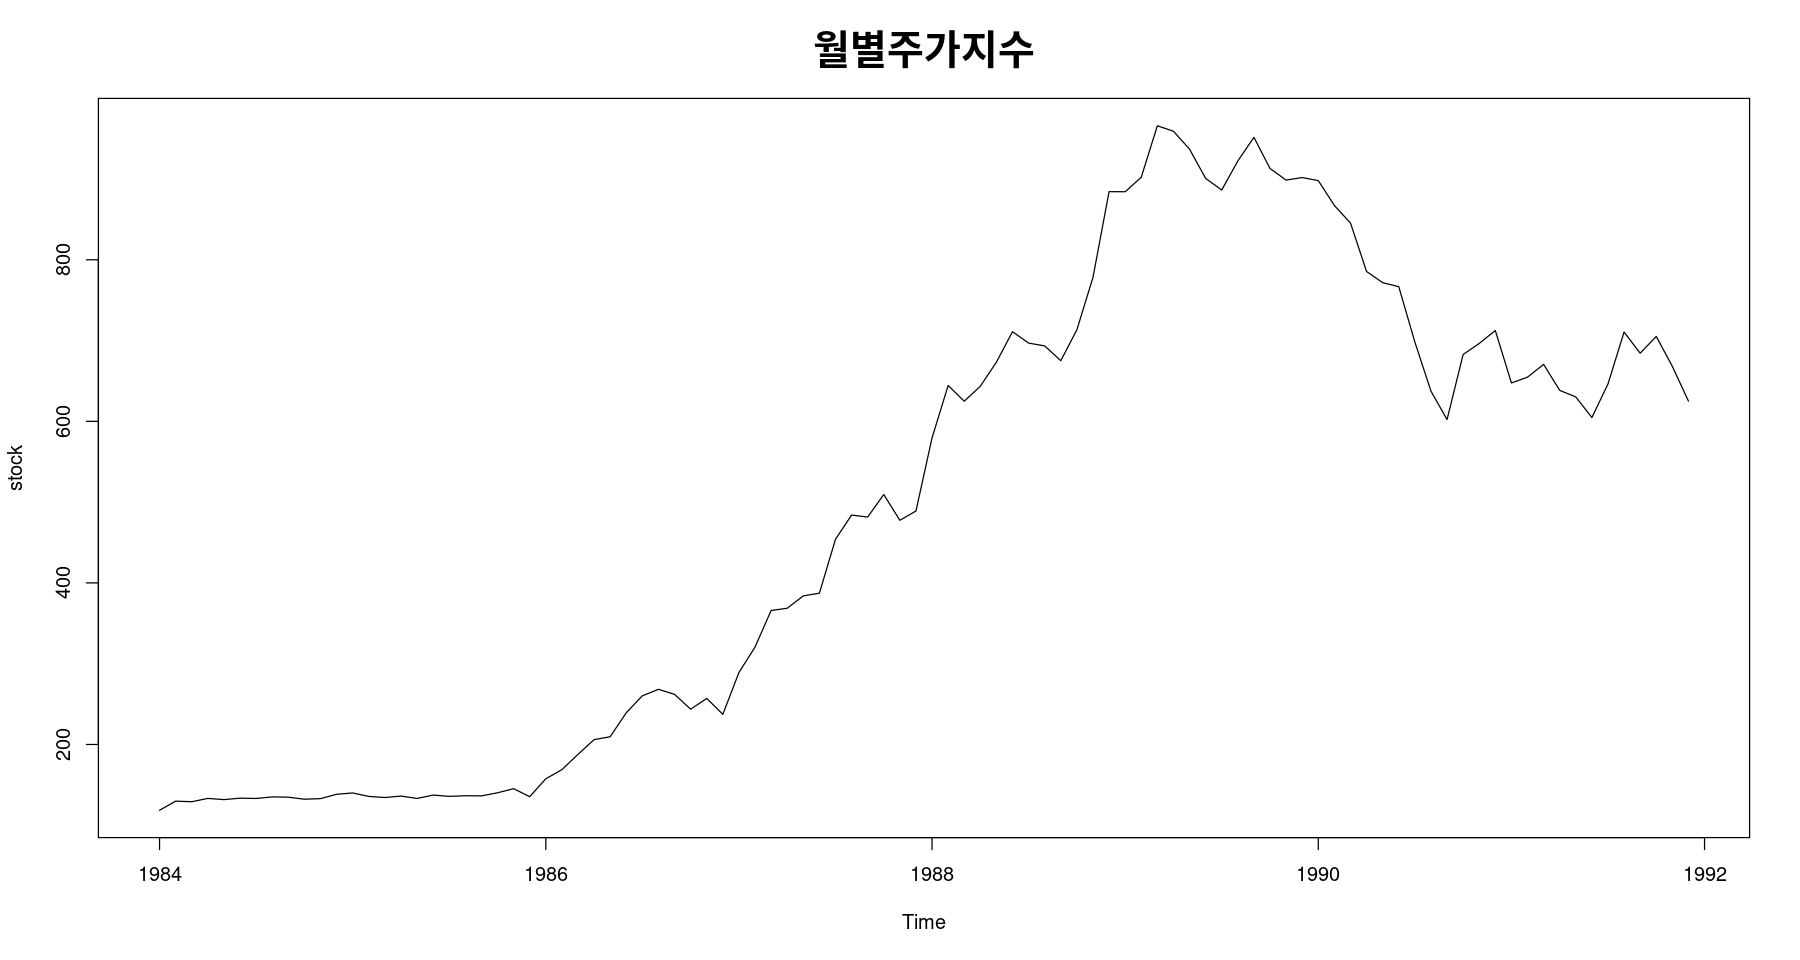

In [115]:
plot(stock, main = '월별주가지수', cex.main=2, cex.lab=2)

## 1모수 이중지수평활 $(\alpha = \beta)$

In [125]:
fit4 = holt(stock, alpha=0.6, beta=0.6, h=6)
fit4$model

Holt's method 

Call:
 holt(y = stock, h = 6, alpha = 0.6, beta = 0.6) 

  Smoothing parameters:
    alpha = 0.6 
    beta  = 0.6 

  Initial states:
    l = 115.6009 
    b = 6.8098 

  sigma:  40.2546

     AIC     AICc      BIC 
1149.575 1149.836 1157.268 

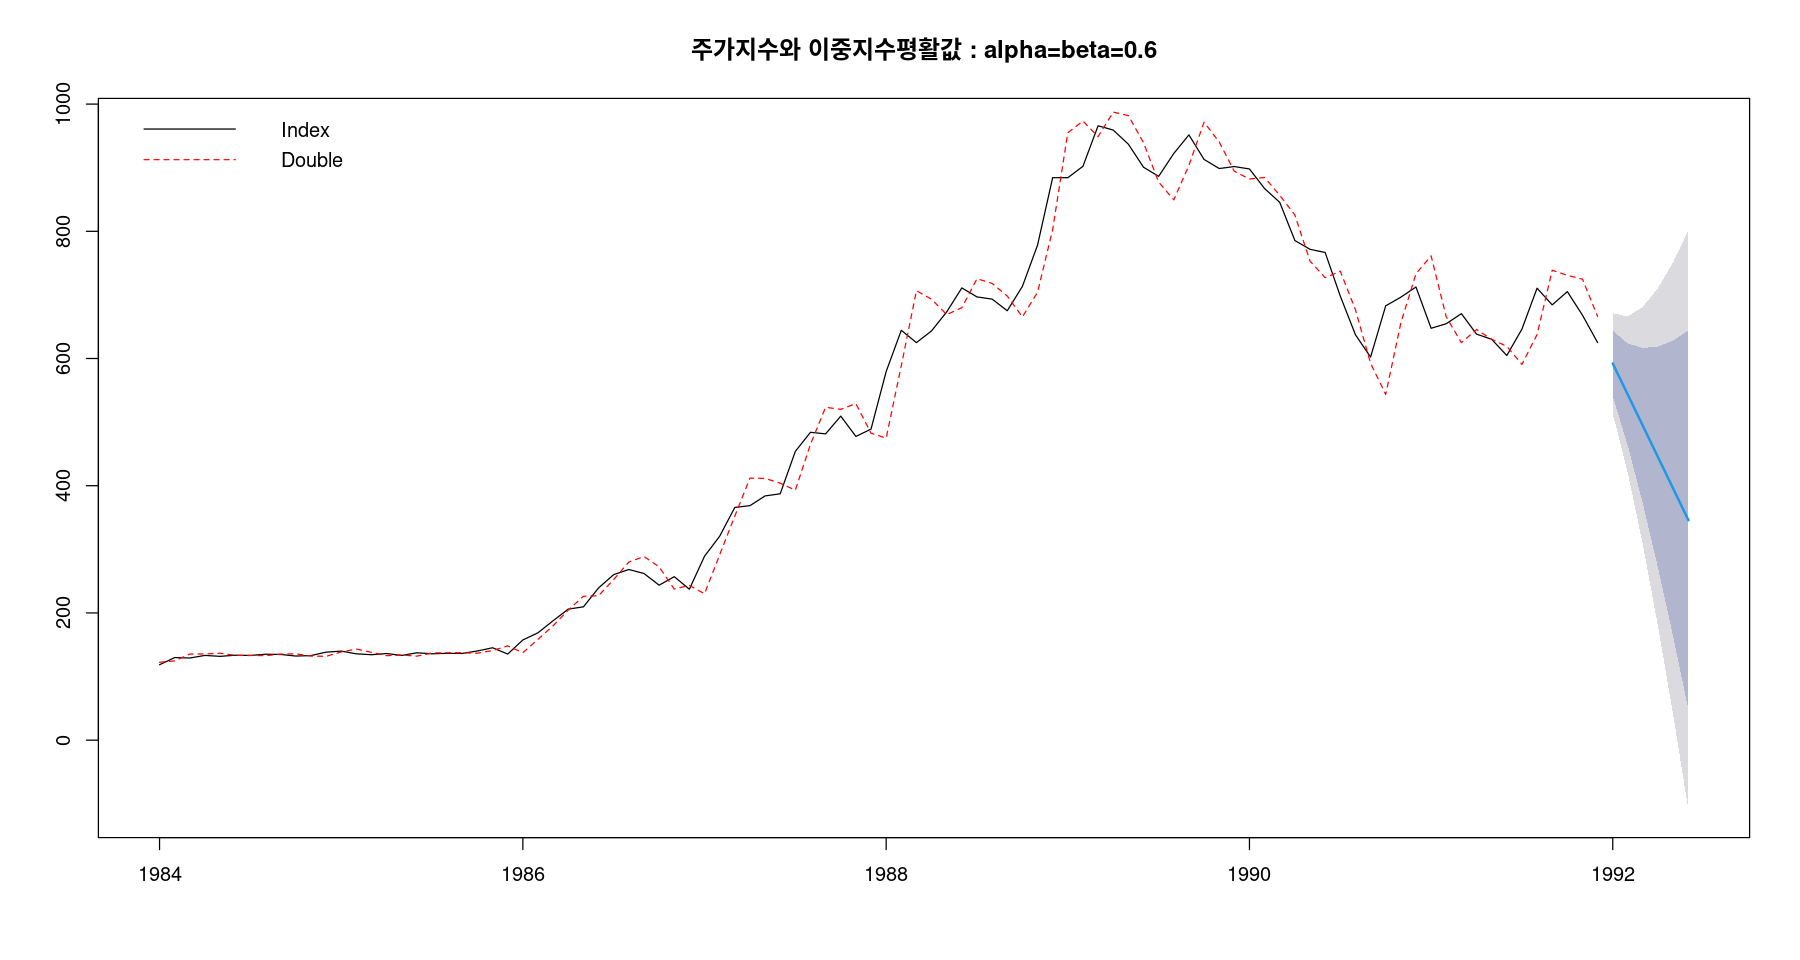

In [126]:
plot(fit4, ylab="", xlab="", lty=1, col="black",
 main="주가지수와 이중지수평활값 : alpha=beta=0.6"
 )
lines(fitted(fit4), col="red", lty=2)
legend("topleft", lty=1:2, col=c("black","red"), c("Index", "Double"), bty = "n")

## 이중지수평활 $\alpha, \beta$ 추정

In [127]:
fit5 = holt(stock, h=6)
fit5$model


Holt's method 

Call:
 holt(y = stock, h = 6) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.1071 

  Initial states:
    l = 124.1137 
    b = 3.4954 

  sigma:  31.8609

     AIC     AICc      BIC 
1108.677 1109.343 1121.498 

In [132]:
fit50 <- HoltWinters(stock,
                     gamma = FALSE)

In [133]:
fit50

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = stock, gamma = FALSE)

Smoothing parameters:
 alpha: 1
 beta : 0.1094451
 gamma: FALSE

Coefficients:
        [,1]
a 625.060000
b  -7.097122

In [135]:
predict(fit50, n.ahead=12, prediction.interval = T, level=0.95) 

,fit,upr,lwr
Jan 1992,617.9629,680.0626,555.8631
Feb 1992,610.8658,703.6185,518.1130
Mar 1992,603.7686,723.4869,484.0504
Apr 1992,596.6715,742.0570,451.2860
May 1992,589.5744,760.1877,418.9611
Jun 1992,582.4773,778.2851,386.6695
Jul 1992,575.3801,796.5695,354.1907
Aug 1992,568.2830,815.1705,321.3955
Sep 1992,561.1859,834.1678,288.2040
Oct 1992,554.0888,853.6121,254.5655


- HoltWinter 예측하는거

In [134]:
fit5

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1992       618.0360 577.2045 658.8674 555.5897 680.4822
Feb 1992       611.0079 550.0961 671.9196 517.8514 704.1644
Mar 1992       603.9798 525.4452 682.5144 483.8715 724.0881
Apr 1992       596.9517 501.6745 692.2290 451.2377 742.6657
May 1992       589.9237 478.2155 701.6319 419.0807 760.7666
Jun 1992       582.8956 454.7987 710.9924 386.9883 778.8028

`-` 시점 n에서 l-시차 후의 예측값

$$\hat {Z}_n(l) = \hat {\beta}_{0,n} + \hat {\beta}_{1,n}(n+l) = \left( 2+ \dfrac{w}{1-w}l \right) S_n^{(1)} - \left( 1+ \dfrac{w}{1-w}l \right) S_n^{(2)}$$

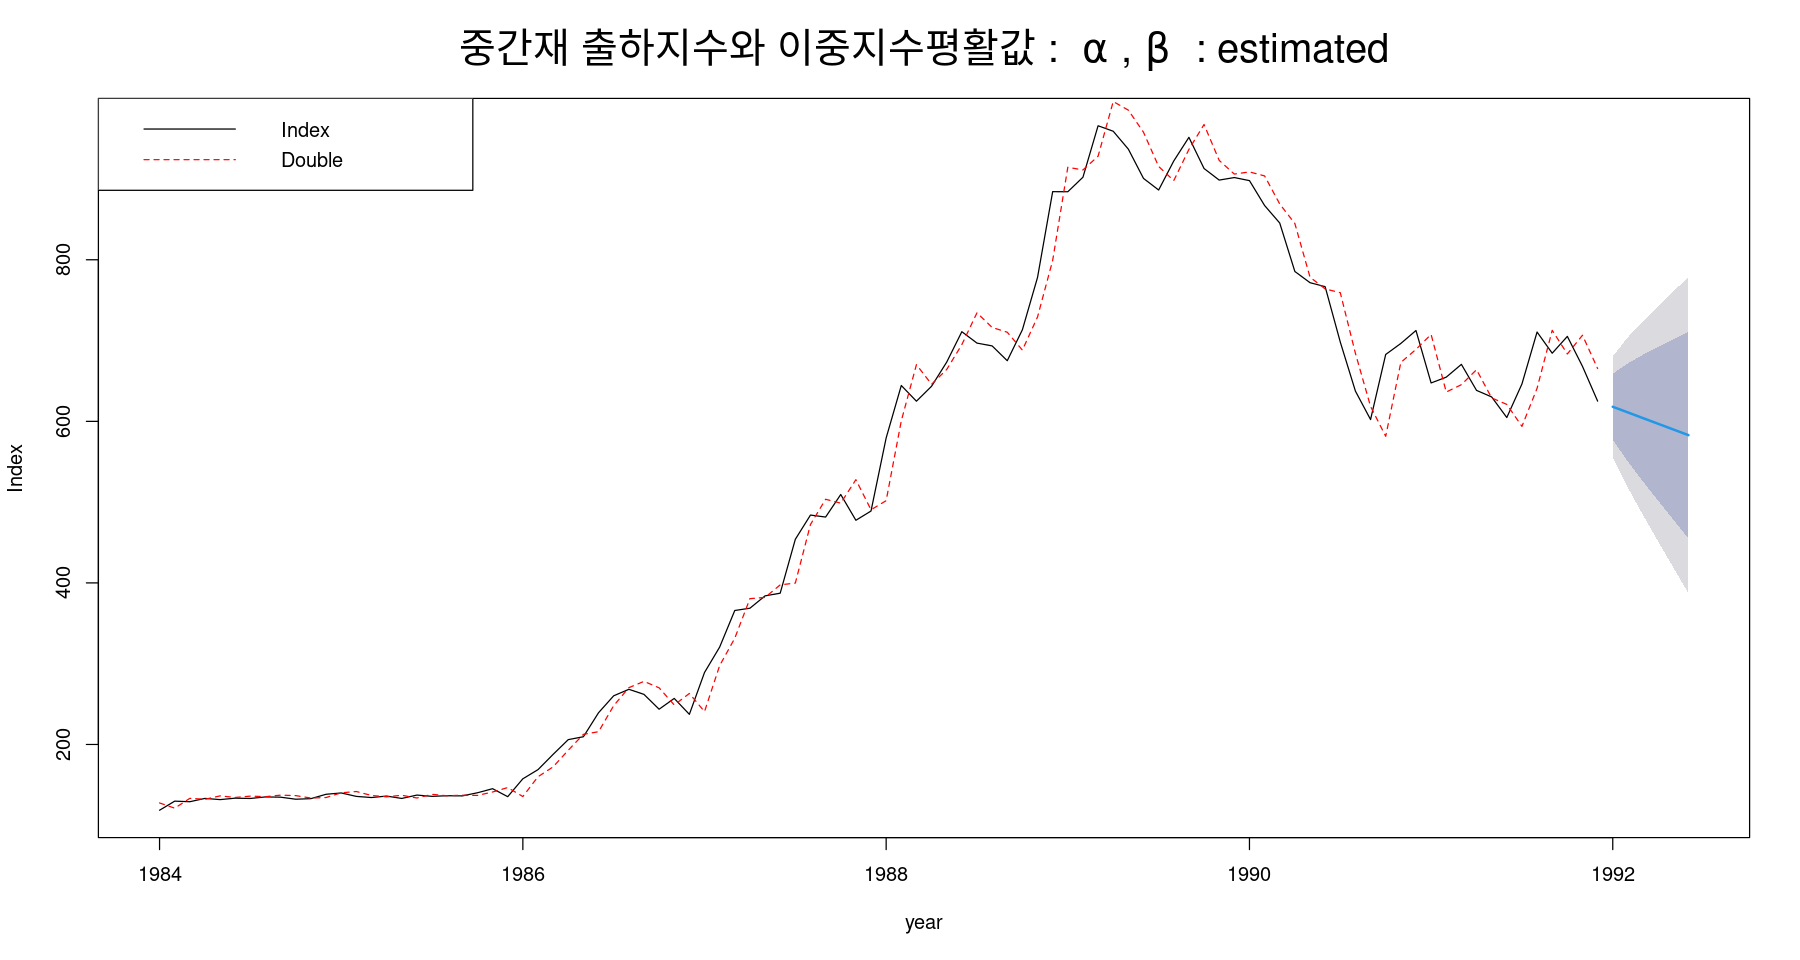

In [129]:
plot(fit5, ylab="Index", xlab="year", lty=1, col="black",
 main=expression("중간재 출하지수와 이중지수평활값 : "~alpha~","~beta~ " : estimated"),
 cex.main=2)
lines(fitted(fit5), col="red", lty=2)
legend("topleft", lty=1:2, col=c("black","red"), c("Index", "Double"))


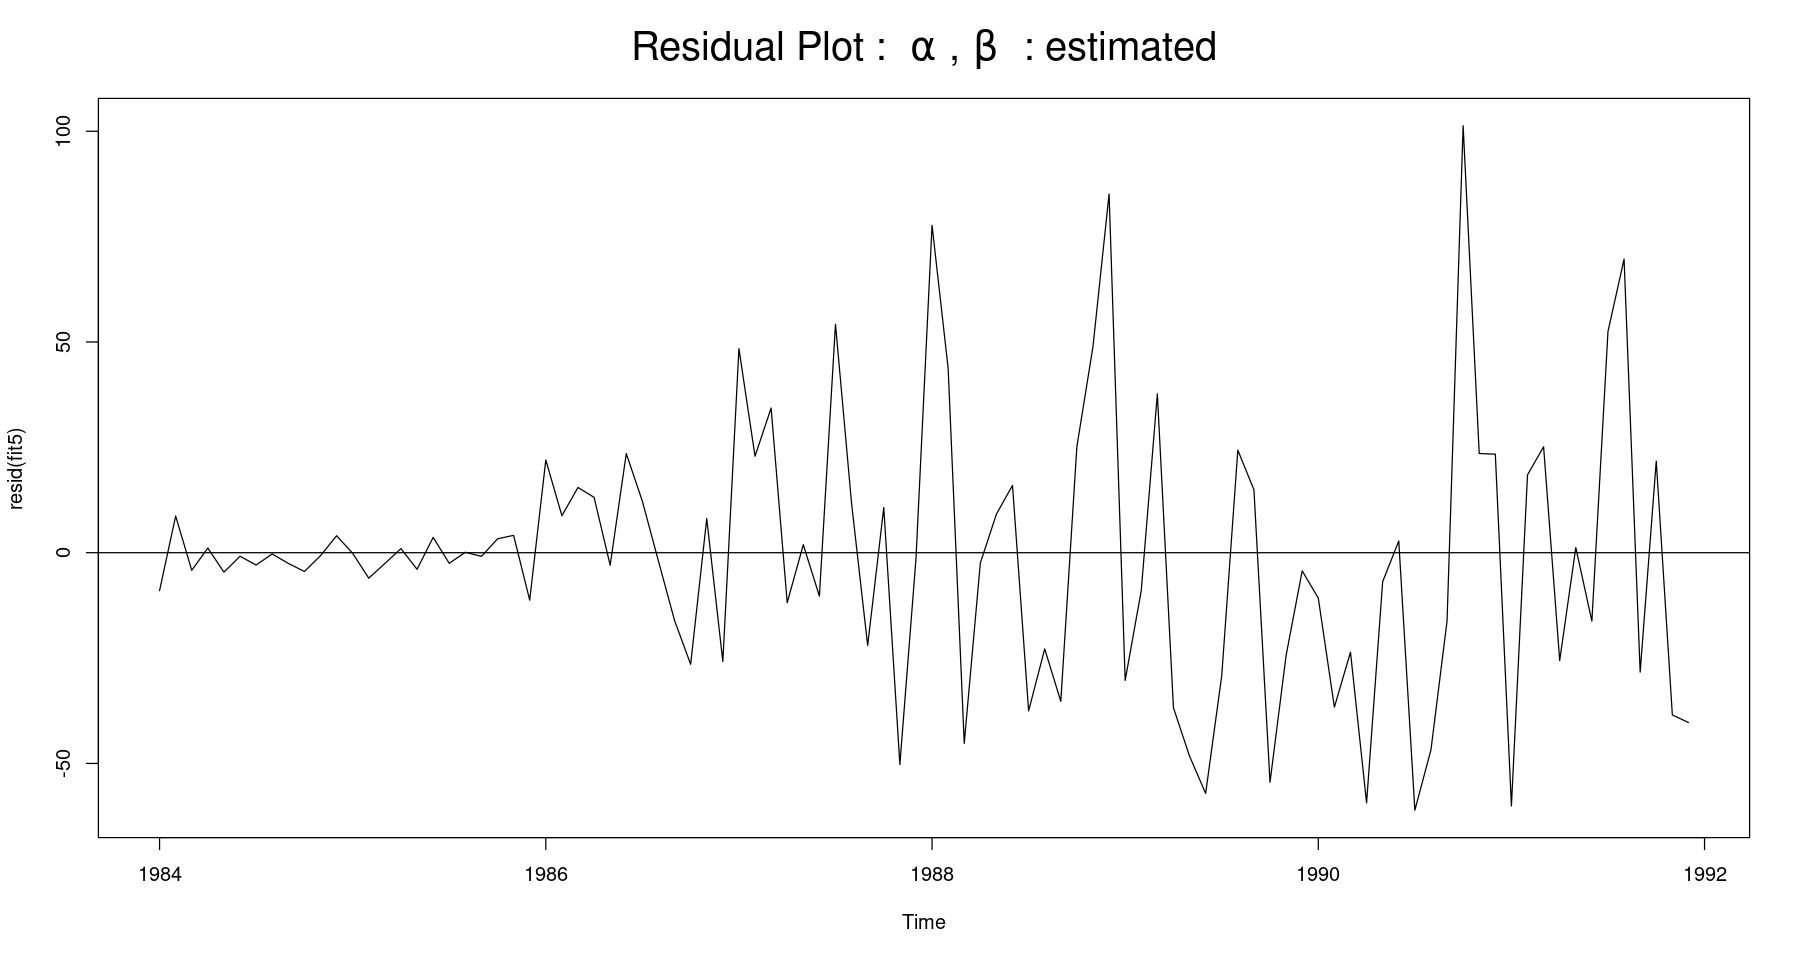

In [136]:
plot(resid(fit5), main=expression("Residual Plot : "~alpha~","~beta~ " : estimated"),
 cex.main=2)
abline(h=0)

In [145]:
dwtest(lm(fit5$residuals~1), alternative = "two.sided")


	Durbin-Watson test

data:  lm(fit5$residuals ~ 1)
DW = 1.658, p-value = 0.09054
alternative hypothesis: true autocorrelation is not 0


# 계절지수평활


In [137]:
z <- scan("koreapass.txt")
pass <- ts(z, start=c(1981,1), frequency=12)


ts에 주기가 들어가 있어야 holtwinter에서 계절을 적합할 수 있다

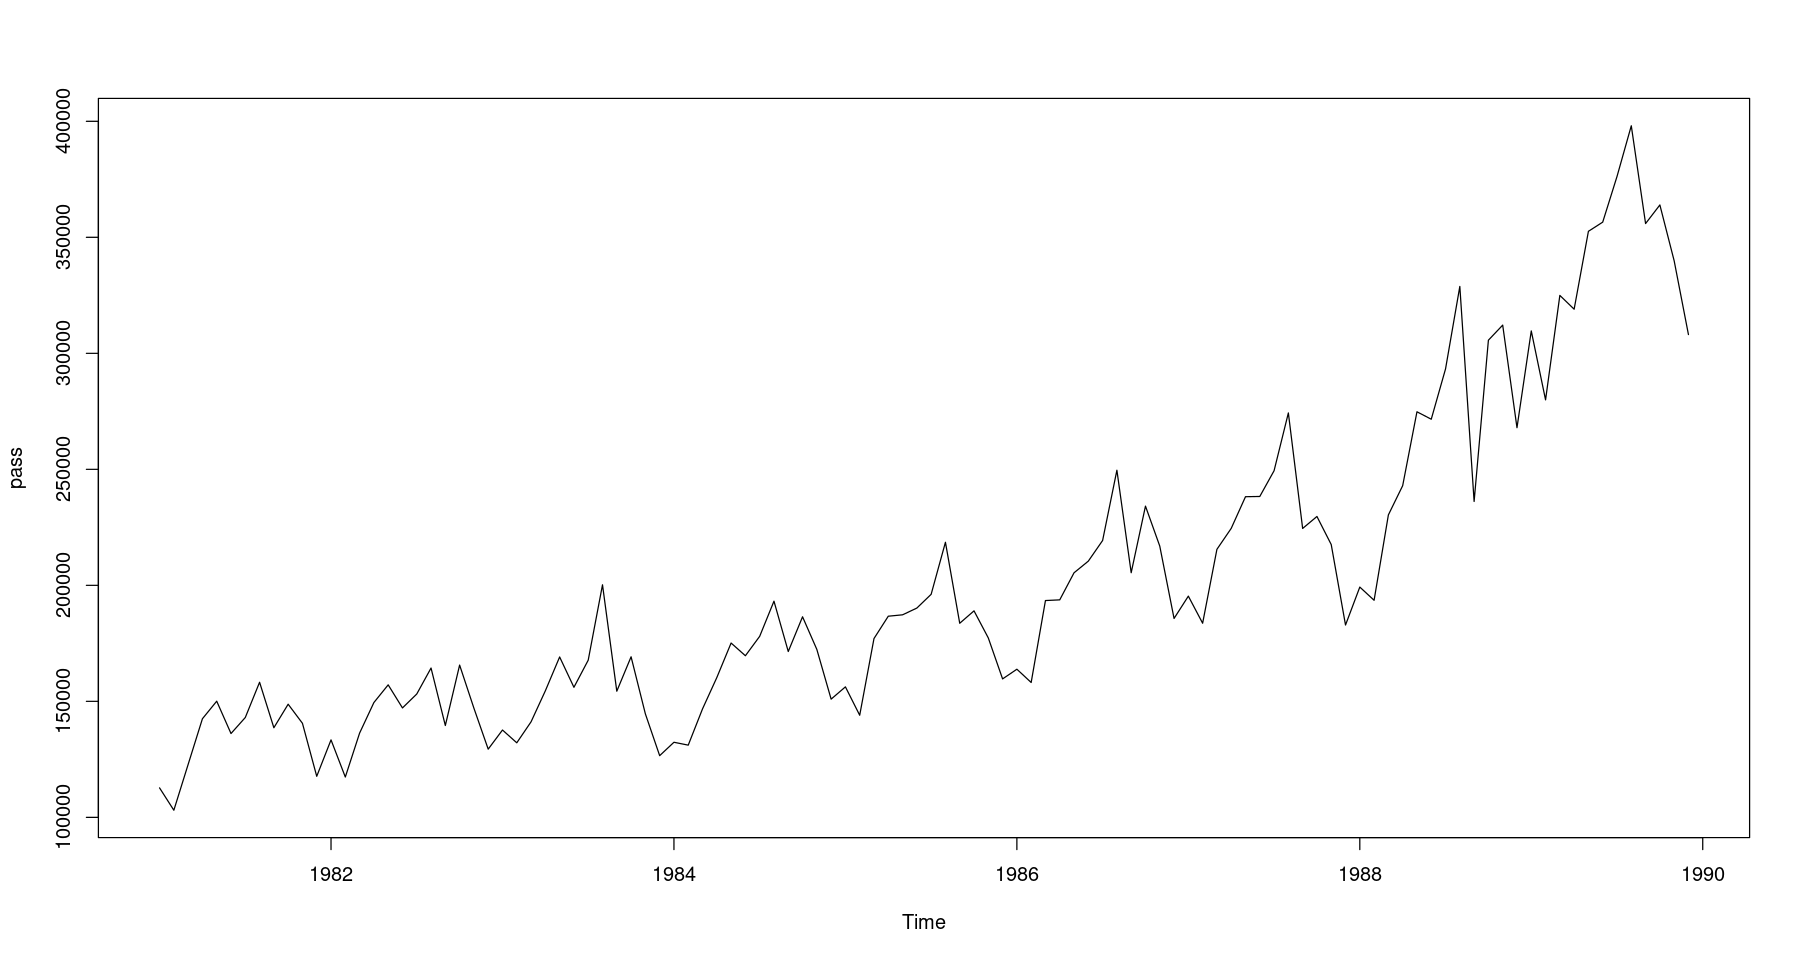

In [138]:
plot.ts(pass)


가법 모형? 승법 모형? 무엇을 쓸지 정해줘야 함

## Holt Winters additive model

In [156]:
fit_hw <- HoltWinters(pass, seasonal="additive") #default는 additive

In [157]:
fit_hw

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = pass, seasonal = "additive")

Smoothing parameters:
 alpha: 0.4810767
 beta : 0.0383379
 gamma: 0.7345988

Coefficients:
          [,1]
a   347794.753
b     3363.251
s1  -12186.666
s2  -33643.322
s3    4855.643
s4    5000.713
s5   29085.909
s6   22953.006
s7   32200.195
s8   49687.643
s9  -11655.430
s10  10218.813
s11  -4226.391
s12 -38683.394

In [159]:
head(fit_hw$fitted)

,xhat,level,trend,season
Jan 1982,128208.0,135375.1,769.6180,-7936.701
Feb 1982,114877.0,138637.6,865.1923,-24625.868
Mar 1982,135627.2,140706.0,911.3201,-5990.160
Apr 1982,149303.2,141945.3,923.8952,6433.924
May 1982,156969.9,142952.4,927.0829,13090.465
Jun 1982,147259.4,143945.4,929.6108,2384.382


In [160]:
135375.1+769.6180-7936.701

[1] 128208

xhat = level + trend + season

`-` 계절지수평활 예측

$$\hat{Z}_n(k) = \hat{T}_n + \hat{\beta}_{1,n}k + \hat{S}_{n+k-s}, k=1,2,\dots, s$$

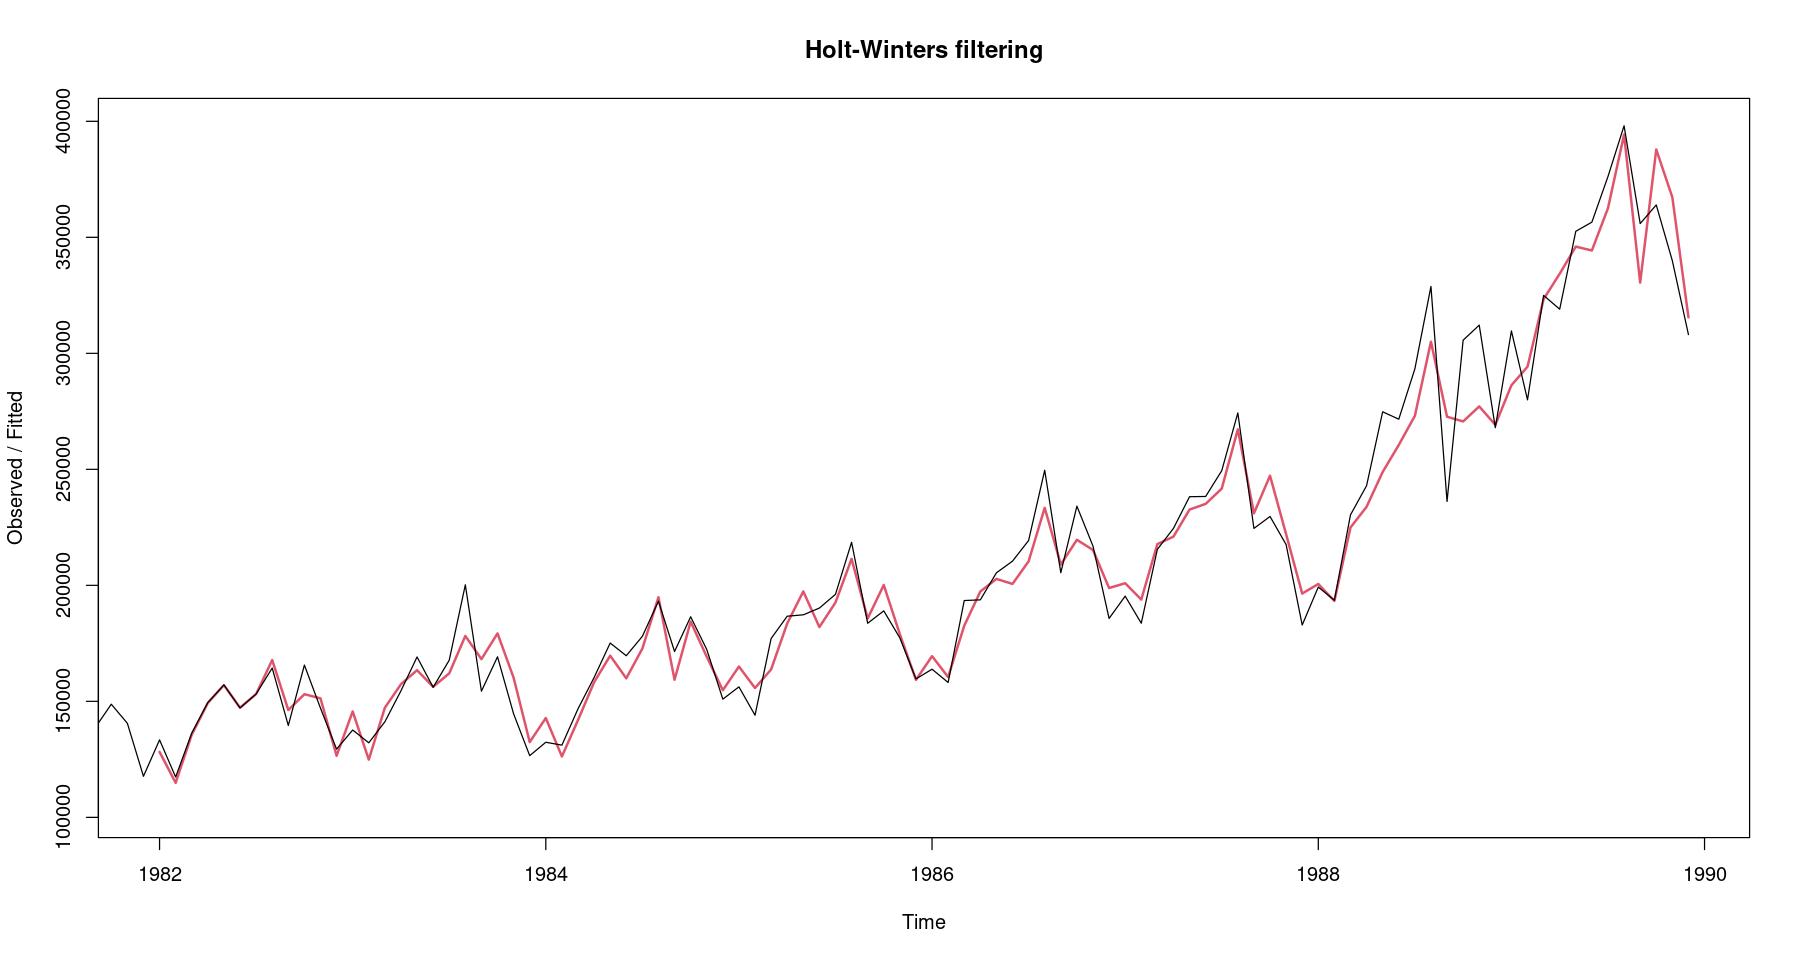

In [141]:
plot(fit_hw, lwd=2)


In [142]:
predict(fit_hw, n.ahead=12, prediction.interval = T, level=0.95)


,fit,upr,lwr
Jan 1990,338971.3,362386.4,315556.2
Feb 1990,320877.9,347051.8,294704.1
Mar 1990,362740.1,391587.4,333892.9
Apr 1990,366248.5,397711.4,334785.5
May 1990,393696.9,427736.7,359657.1
Jun 1990,390927.3,427518.3,354336.2
Jul 1990,403537.7,442664.2,364411.2
Aug 1990,424388.4,466041.9,382734.9
Sep 1990,366408.6,410586.3,322230.9
Oct 1990,391646.1,438349.7,344942.5


In [143]:
fit6= hw(pass,
 alpha = fit_hw$alpha,
 beta = fit_hw$beta,
 gamma = fit_hw$gamma,
 seasonal="additive",
 initial="simple",
 h=12)
fit6$model

Holt-Winters' additive method 

Call:
 hw(y = pass, h = 12, seasonal = "additive", initial = "simple",  

 Call:
     alpha = fit_hw$alpha, beta = fit_hw$beta, gamma = fit_hw$gamma) 

  Smoothing parameters:
    alpha = 0.4811 
    beta  = 0.0383 
    gamma = 0.7346 

  Initial states:
    l = 134510.75 
    b = 874.0694 
    s = -16817.75 6028.25 14250.25 4115.25 23712.25 8522.25
           1617.25 15553.25 7985.25 -11710.75 -31440.75 -21814.75

  sigma:  12483.69

In [146]:
fit6


         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1990       339962.9 323964.4 355961.4 315495.3 364430.4
Feb 1990       307759.0 289731.1 325786.9 280187.7 335330.3
Mar 1990       354907.1 334791.7 375022.5 324143.3 385670.9
Apr 1990       353308.1 331046.6 375569.6 319262.1 387354.2
May 1990       391666.8 367200.6 416133.1 354249.0 429084.7
Jun 1990       393291.1 366562.0 420020.2 352412.5 434169.7
Jul 1990       408050.5 379001.1 437099.9 363623.2 452477.8
Aug 1990       428126.3 396699.7 459552.8 380063.5 476189.1
Sep 1990       374195.2 340335.6 408054.7 322411.4 425978.9
Oct 1990       381277.1 344929.5 417624.7 325688.2 436866.0
Nov 1990       373366.6 334476.8 412256.5 313889.7 432843.5
Dec 1990       347593.0 306107.7 389078.3 284146.7 411039.3

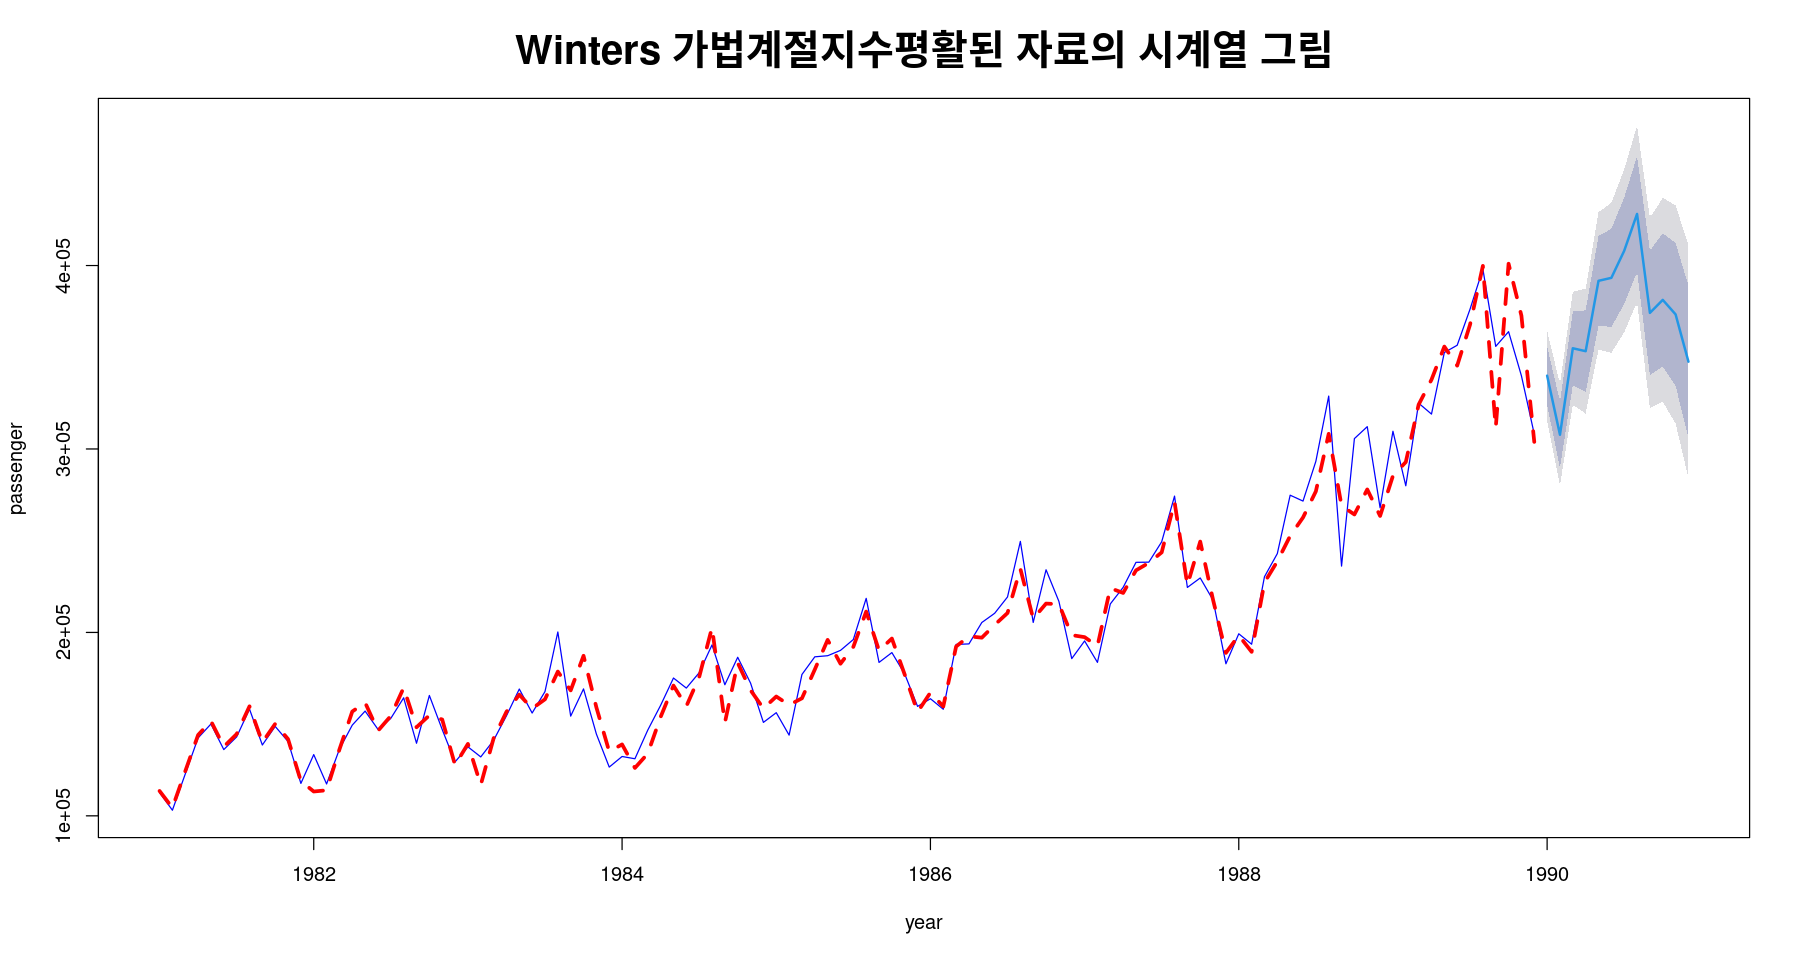

In [161]:
plot(fit6, ylab="passenger", xlab="year", lty=1, col="blue",
 main="Winters 가법계절지수평활된 자료의 시계열 그림",
 cex.main=2)
lines(fit6$fitted, lwd=3, col='red', lty=2)

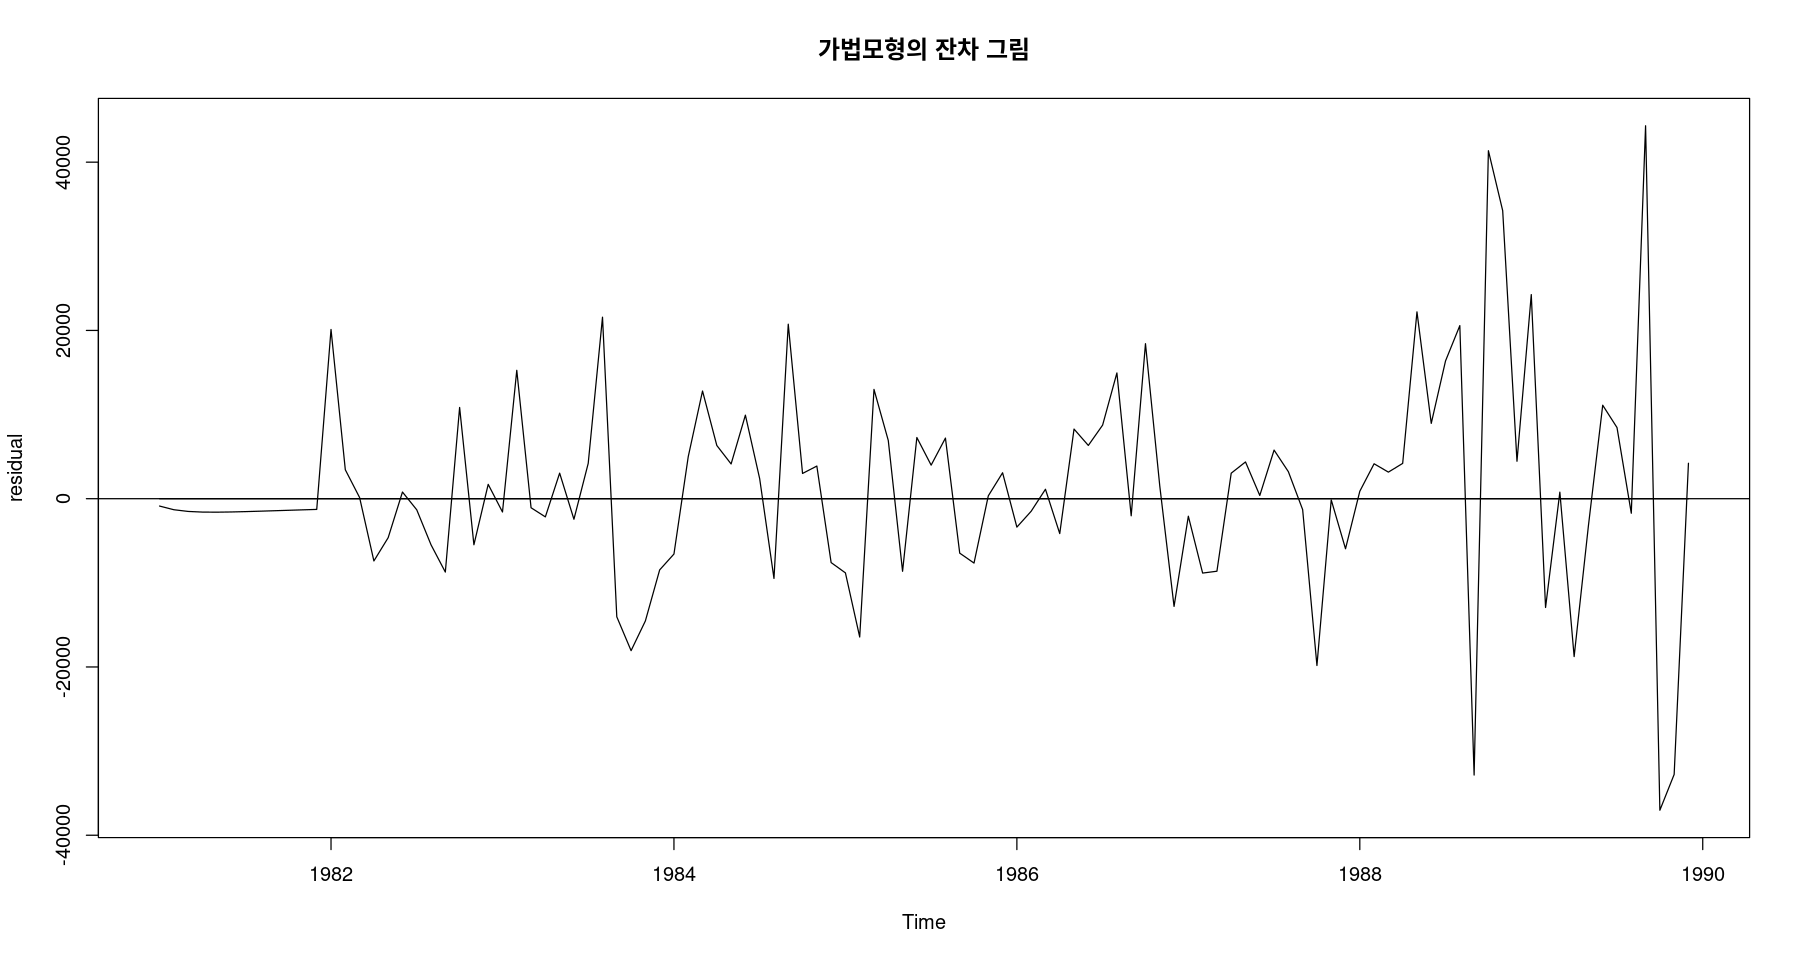

In [148]:
ts.plot(fit6$residual, ylab="residual",
 main="가법모형의 잔차 그림",
 cex.main=2); abline(h=0)


In [149]:
dwtest(lm(fit6$residual~1), alternative = 'two.sided')


	Durbin-Watson test

data:  lm(fit6$residual ~ 1)
DW = 1.9794, p-value = 0.9139
alternative hypothesis: true autocorrelation is not 0


## Holt Winters multiplicative model

In [150]:
fit_hw_m <- HoltWinters(pass, seasonal="multiplicative")
fit_hw_m


Holt-Winters exponential smoothing with trend and multiplicative seasonal component.

Call:
HoltWinters(x = pass, seasonal = "multiplicative")

Smoothing parameters:
 alpha: 0.5623303
 beta : 0.03452066
 gamma: 0.3506508

Coefficients:
            [,1]
a   3.560417e+05
b   3.517556e+03
s1  9.199511e-01
s2  8.489190e-01
s3  9.796617e-01
s4  1.016528e+00
s5  1.095078e+00
s6  1.060795e+00
s7  1.089621e+00
s8  1.178393e+00
s9  9.706046e-01
s10 1.065056e+00
s11 9.983082e-01
s12 8.552947e-01

In [151]:
predict(fit_hw_m, n.ahead=12, prediction.interval = T, level=0.95)


,fit,upr,lwr
Jan 1990,330777.0,346829.6,314724.3
Feb 1990,308222.8,328288.3,288157.4
Mar 1990,359138.5,385415.3,332861.7
Apr 1990,376229.1,406856.5,345601.8
May 1990,409153.3,445160.0,373146.6
Jun 1990,400075.7,438217.8,361933.6
Jul 1990,414780.3,456969.6,372591.0
Aug 1990,452717.7,501167.0,404268.5
Sep 1990,376303.1,419627.5,332978.8
Oct 1990,416668.2,466954.3,366382.1


`-` 예측

$$\hat{Z}(l) = \hat{T}_n(l) \times \hat{S}_{n+l-ks}, k= \left[ \frac{l}{s} \right] +1$$

In [165]:
(135375.1+769.6180)*0.9434021

[1] 128439.2

xhat = (level+trend)*season

In [162]:
fit_hw_m$fitted

,xhat,level,trend,season
Jan 1982,128439.2,135375.1,769.6180,0.9434021
Feb 1982,115639.6,139095.7,871.4889,0.8261910
Mar 1982,136017.4,141150.4,912.3332,0.9574463
Apr 1982,149518.1,142234.0,918.2449,1.0444694
May 1982,157061.6,143129.5,917.4625,1.0903497
Jun 1982,147301.4,144070.4,918.2707,1.0159511
Jul 1982,153718.4,144910.4,915.5686,1.0541223
Aug 1982,168929.0,145526.0,905.2115,1.1536408
Sep 1982,145356.8,144200.2,828.1961,1.0022647
Oct 1982,152328.4,141789.5,716.3873,1.0689275


In [166]:
fit7= hw(pass,
 alpha = fit_hw_m$alpha,
 beta = fit_hw_m$beta,
 gamma = fit_hw_m$gamma,
 seasonal="multiplicative",
 initial="simple",
 h=12)
fit7$model


Holt-Winters' multiplicative method 

Call:
 hw(y = pass, h = 12, seasonal = "multiplicative", initial = "simple",  

 Call:
     alpha = fit_hw_m$alpha, beta = fit_hw_m$beta, gamma = fit_hw_m$gamma) 

  Smoothing parameters:
    alpha = 0.5623 
    beta  = 0.0345 
    gamma = 0.3507 

  Initial states:
    l = 134510.75 
    b = 874.0694 
    s = 0.875 1.0448 1.1059 1.0306 1.1763 1.0634
           1.012 1.1156 1.0594 0.9129 0.7663 0.8378

  sigma:  0.053

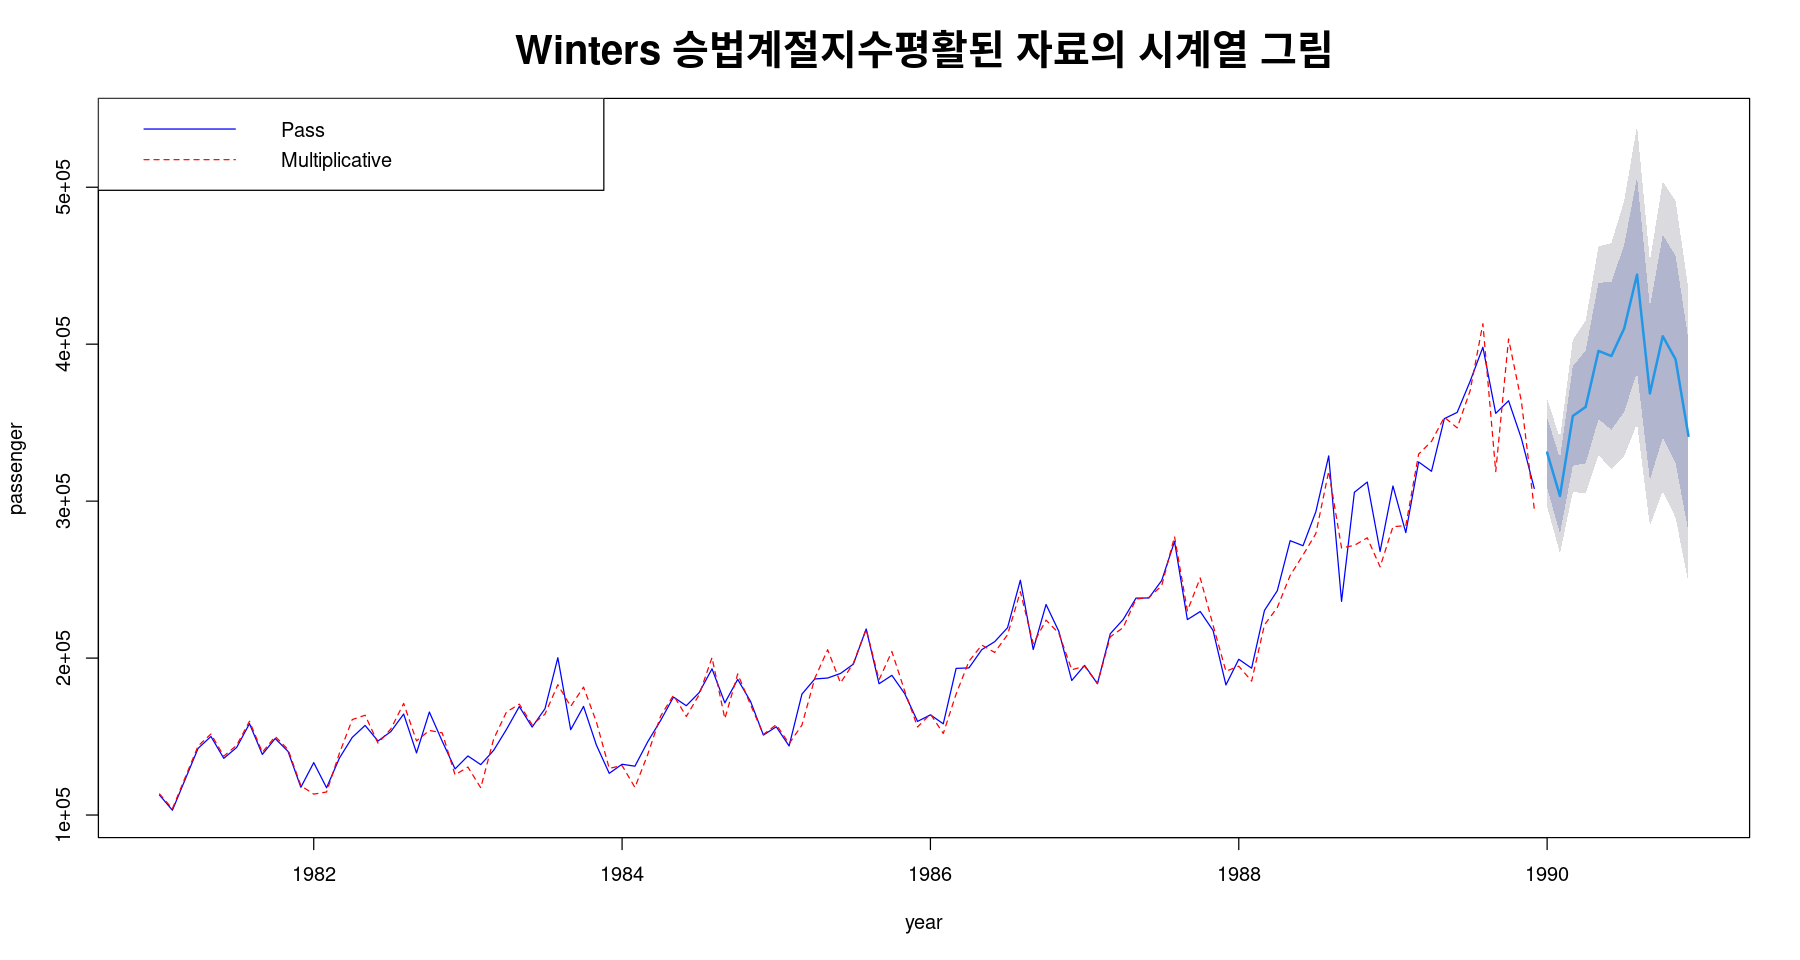

In [167]:
plot(fit7, ylab="passenger", xlab="year", lty=1, col="blue",
 main="Winters 승법계절지수평활된 자료의 시계열 그림",
 cex.main=2)
lines(fit7$fitted, col="red", lty=2)
legend("topleft", lty=1:2, col=c("blue","red"), c("Pass", "Multiplicative"))

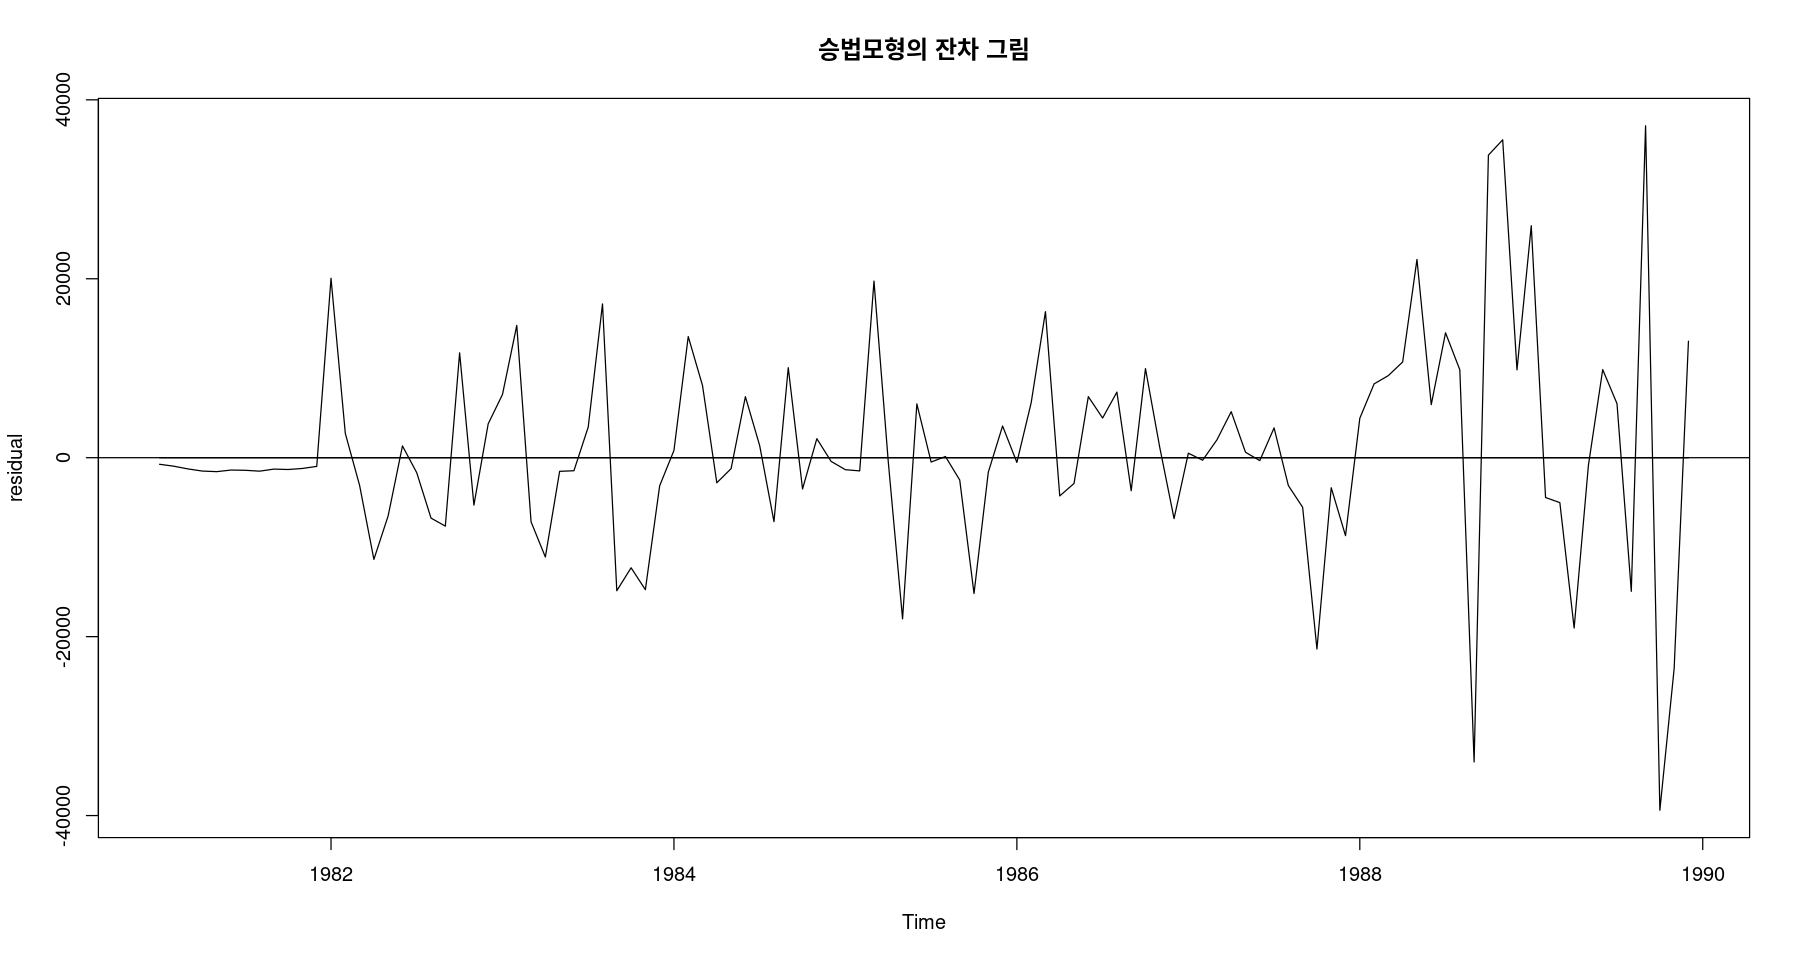

In [168]:
ts.plot(fit7$residual, ylab="residual",
 main="승법모형의 잔차 그림",
 cex.main=2); abline(h=0)


In [169]:
dwtest(lm(fit7$residual~1), alternative = 'two.sided')


	Durbin-Watson test

data:  lm(fit7$residual ~ 1)
DW = 1.9744, p-value = 0.8931
alternative hypothesis: true autocorrelation is not 0


---

In [170]:
fit_hw$SSE

[1] 13764737658

In [172]:
fit_hw_m$SSE

[1] 12633778874

가법과 승법 모형의 SSE를 비교해서 SSE값이 더 작은 모형을 선택해 주자.

---

# 함수 정리

`단순지수평활`: HoltWinters(beta=gamma=FALSE), ses: 추세도 없고 계절성분도 없어보일 때 사용

`이중지수평활`: HoltWinters(gamma=FALSE), holt: 추세가 있을 때 사용

`계절지수평활`: HoltWinters(), hw: 계절 성분 있을 때 사용

위의 함수를 사용하기 전에 가장 먼저 `시도표`를 보자!